# Import libraries and configs

In [17]:
import numpy as np
import pandas as pd
import scipy.stats
pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt, rcParams
import cv2
import seaborn as sns
sns.set(style = "white", context="paper")
from cycler import cycler
import os, sys
import glob
import datetime
import matplotlib.cm as cm
import base64
from PIL import Image
from io import BytesIO as _BytesIO
import requests
import json
import pickle
from datetime import datetime
from IPython.display import display, Markdown, Latex
import collections
from copy import deepcopy
from itertools import combinations
import plotly
# from pandas_profiling import ProfileReport

pd.options.display.max_columns = None
def printm(s): return display(Markdown(s))


ModuleNotFoundError: No module named 'plotly'

In [ ]:
import site
site.getsitepackages()

!pip install scipy opencv-python seaborn plotly

## Plotting configs

In [18]:
hatch_patterns = ['', '+', '-', '\\', 'x', '/', '+', '-']
hatch_density = 1
opacity = 0.8

In [19]:
## config for various kinds of graphs

gconfigs = {
    'barplot':{'color':'blue', 'linestyle':'-.','marker':'.','alpha':0.5}
}

classif_models = ['mobilenet0.25','squeezenet1.0','resnet50_v2','densenet201','alexnet']
detect_models = ['ssd_512_mobilenet1.0_voc','yolo3_mobilenet1.0_voc','ssd_512_resnet50_v1_voc','yolo3_darknet53_voc']

model_name_map = {
    'mobilenet0.25':'MobileNet',
    'squeezenet1.0':'SqueezeNet',
    'resnet50_v2':'ResNet50',
    'densenet201':'DenseNet',
    'alexnet':'AlexNet',
    'ssd_512_mobilenet1.0_voc':'SSDMobilenet',
    'yolo3_mobilenet1.0_voc':'YOLOMobilenet',
    'ssd_512_resnet50_v1_voc':'SSDResnet50',
    'yolo3_darknet53_voc':'YOLODarknet'
}
model_name_order = {
    'MobileNet':0,
    'SqueezeNet':1,
    'DenseNet':2,
    'ResNet50':3,
    'AlexNet':4,
    'SSDMobilenet':5,
    'YOLOMobilenet':6,
    'SSDResnet50':7,
    'YOLODarknet':8
    
}

lambda_functions_map = {
    'lambda-detect-ssdmobilenet':'SSDMobilenet',
    'lambda-detect-yolomobilenet':'YOLOMobilenet',
    'lambda-detect-ssdresnet50':'SSDResnet50',
    'lambda-detect-yolodarknet':'YOLODarknet',
    'lambda-classif-mobilenet':'MobileNet',
    'lambda-classif-squeezenet':'SqueezeNet',
    'lambda-classif-densenet':'DenseNet',
    'lambda-classif-resnet50':'ResNet50',
    'lambda-classif-alexnet':'AlexNet',
}
#Percentile calculations
def perc_75(x): return np.percentile(x,75)
def perc_25(x): return np.percentile(x,25)

#Set default RC parameters
notebook_default_rcparams = {
    "axes.titlesize":32,
    "axes.labelsize": 32,
    "legend.title_fontsize":32,
    "legend.fontsize":32,
    "xtick.labelsize":32,
    "ytick.labelsize":32,
    "axes.grid":True,
    "legend.framealpha":0.5,
    "lines.linewidth":5,
    "legend.loc":'upper left'
    
}
rcParams.update(notebook_default_rcparams)

time_taken_label = " Time (seconds)"
block_id_label = " Blocks"
EPSILON = 2e-2
#plotting dir

data_dir = f'Final_Evaluation_Data'
plotting_dir = f'plots/{datetime.now().strftime("%Y%m%d")}'
if not os.path.exists(plotting_dir):
    os.makedirs(plotting_dir)

In [20]:
[xr for xr in rcParams if 'legend' in xr]

['legend.borderaxespad',
 'legend.borderpad',
 'legend.columnspacing',
 'legend.edgecolor',
 'legend.facecolor',
 'legend.fancybox',
 'legend.fontsize',
 'legend.framealpha',
 'legend.frameon',
 'legend.handleheight',
 'legend.handlelength',
 'legend.handletextpad',
 'legend.labelspacing',
 'legend.loc',
 'legend.markerscale',
 'legend.numpoints',
 'legend.scatterpoints',
 'legend.shadow',
 'legend.title_fontsize']

# Graph 1: Runtime Evaluation

## Fetch Data

In [21]:
# Fetch RPI Data
rpi_folder = f'{data_dir}/Graph 1/RPI'

df_g1_rpi=None

for model in classif_models:
    filename = f'{rpi_folder}/Graph1_run0630_{model}.csv'
    df_model = pd.read_csv(filename)
    df_model['model'] = model_name_map[model]
    if df_g1_rpi is None:
        df_g1_rpi = df_model.copy(deep=True)
    else:
        df_g1_rpi = pd.concat([df_g1_rpi,df_model],ignore_index=True)
            

df_g1_rpi

,app_model,app_input,app_format,app_run,app_top,model
0,0.288660,0.001781,0.003132,0.165511,0.000981,MobileNet
1,0.288660,0.002247,0.002481,0.140328,0.001231,MobileNet
2,0.288660,0.002221,0.002543,0.151113,0.001214,MobileNet
3,0.288660,0.002337,0.002613,0.147636,0.001137,MobileNet
4,0.288660,0.002315,0.002596,0.142882,0.001145,MobileNet
...,...,...,...,...,...,...
495,137.652587,0.001903,0.002579,0.619226,0.001178,AlexNet
496,137.652587,0.001978,0.002570,0.618382,0.001159,AlexNet
497,137.652587,0.001911,0.002578,0.618452,0.001164,AlexNet
498,137.652587,0.001925,0.002676,0.618925,0.001167,AlexNet


In [22]:
# Fetch jetson Data

In [23]:
# Fetch jetson Data
jetson_folder = f'{data_dir}/Graph 1/Jetson'

df_g1_jetson=None

for model in model_name_map.keys():
    filename = f'{jetson_folder}/{model}_{model}.csv'
    df_model = pd.read_csv(filename)
    df_model['model'] = model_name_map[model]
    if df_g1_jetson is None:
        df_g1_jetson = df_model.copy(deep=True)
    else:
        df_g1_jetson = pd.concat([df_g1_jetson,df_model],ignore_index=True)
            

df_g1_jetson

,app_model,app_input,app_format,app_run,app_top,model
0,27.537124,0.013917,0.006001,7.134475,0.084827,MobileNet
1,27.537124,0.010264,0.004985,0.070305,0.004633,MobileNet
2,27.537124,0.002281,0.004937,0.038904,0.003200,MobileNet
3,27.537124,0.000940,0.004358,0.033049,0.003216,MobileNet
4,27.537124,0.000734,0.003897,0.032378,0.001699,MobileNet
...,...,...,...,...,...,...
895,31.614636,0.004247,0.004937,1.397062,0.001167,YOLODarknet
896,31.614636,0.004073,0.004677,1.396688,0.000939,YOLODarknet
897,31.614636,0.003615,0.005107,1.398085,0.001004,YOLODarknet
898,31.614636,0.004250,0.004450,1.443792,0.000822,YOLODarknet


In [24]:
# Fetch Lambda Data
lambda_folder = f'{data_dir}/Graph 1/Lambda'
df_g1_lambda_cold = None
df_g1_lambda_warm = None



for filename in glob.glob(f'{lambda_folder}/*'):
    for lambda_fn in lambda_functions_map.keys():
        if (lambda_fn in filename):
#             print(i, filename, lambda_functions_map[lambda_fn])
            df_fn = pd.read_csv(filename)
            df_fn['model'] = lambda_functions_map[lambda_fn]
            df_fn_cold = df_fn.iloc[0:1]
            df_fn_warm = df_fn.iloc[1:]
            if df_g1_lambda_cold is None:
                df_g1_lambda_cold = df_fn_cold.copy(deep=True)
            else:
                df_g1_lambda_cold = pd.concat([df_g1_lambda_cold,df_fn_cold],ignore_index=True)
            
            if df_g1_lambda_warm is None:
                df_g1_lambda_warm = df_fn_warm.copy(deep=True)
            else:
                df_g1_lambda_warm = pd.concat([df_g1_lambda_warm,df_fn_warm],ignore_index=True)


df_g1_lambda_cold    

,sid,tid,invoke_time,app_input,app_format,app_tvm,app_top,wrapper_app,wrapper_appkey,wrapper_decrypt_key,wrapper_decrypt_data,wrapper_encrypt_response,total_time,model
0,0,0,20210702_150758,1.135,0.778,7073.153,0.034,7129,37,1641,617,35,12273.697853,DenseNet
1,0,0,20210703_160043,1.247,0.958,9797.549,0.033,9852,32,1512,602,25,14686.141491,ResNet50
2,0,0,20210702_150821,1.081,0.753,9679.112,0.032,9730,31,1485,544,37,14829.249144,ResNet50
3,0,0,20210630_021059,1.019,0.765,6771.215,0.033,6819,35,1522,721,23,11642.870903,DenseNet
4,0,0,20210703_094806,14.581,2.749,17764.001,-1.000,17833,32,1525,598,25,22921.751022,SSDResnet50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0,0,20210704_063624,12.112,2.295,10279.781,-1.000,10345,32,1632,1224,29,16020.710945,YOLOMobilenet
212,0,0,20210630_021614,1.236,0.932,27249.500,0.053,27306,31,1501,500,33,33046.717882,AlexNet
213,0,0,20210702_170655,1.110,0.811,27027.876,0.037,27088,37,1553,1006,29,33937.822104,AlexNet
214,0,0,20210702_232259,12.168,2.384,10207.351,-1.000,10271,35,1461,1193,20,16306.174278,YOLOMobilenet


## Draw Stacked Multiple Bar plot(Individual)

### Get Mean Data

In [25]:
local_columns = ['app_input','app_format','app_run,','app_top']
remote_columns = ['app_input','app_format','app_tvm,','app_top','wrapper_decrypt_key', 'wrapper_decrypt_data','wrapper_encrypt_response']
df_g1_lambda_cold

,sid,tid,invoke_time,app_input,app_format,app_tvm,app_top,wrapper_app,wrapper_appkey,wrapper_decrypt_key,wrapper_decrypt_data,wrapper_encrypt_response,total_time,model
0,0,0,20210702_150758,1.135,0.778,7073.153,0.034,7129,37,1641,617,35,12273.697853,DenseNet
1,0,0,20210703_160043,1.247,0.958,9797.549,0.033,9852,32,1512,602,25,14686.141491,ResNet50
2,0,0,20210702_150821,1.081,0.753,9679.112,0.032,9730,31,1485,544,37,14829.249144,ResNet50
3,0,0,20210630_021059,1.019,0.765,6771.215,0.033,6819,35,1522,721,23,11642.870903,DenseNet
4,0,0,20210703_094806,14.581,2.749,17764.001,-1.000,17833,32,1525,598,25,22921.751022,SSDResnet50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0,0,20210704_063624,12.112,2.295,10279.781,-1.000,10345,32,1632,1224,29,16020.710945,YOLOMobilenet
212,0,0,20210630_021614,1.236,0.932,27249.500,0.053,27306,31,1501,500,33,33046.717882,AlexNet
213,0,0,20210702_170655,1.110,0.811,27027.876,0.037,27088,37,1553,1006,29,33937.822104,AlexNet
214,0,0,20210702_232259,12.168,2.384,10207.351,-1.000,10271,35,1461,1193,20,16306.174278,YOLOMobilenet


In [26]:
# get mean values
df_g1_rpi_med = df_g1_rpi.groupby('model')['app_model','app_input','app_format','app_run','app_top'].mean()
df_g1_jetson_med = df_g1_jetson.groupby('model')['app_model','app_input','app_format','app_run','app_top'].mean()
df_g1_lambda_cold_med = df_g1_lambda_cold.groupby('model')['app_input','app_format','app_tvm','app_top','wrapper_appkey','wrapper_decrypt_key', 'wrapper_decrypt_data','wrapper_encrypt_response'].mean()
df_g1_lambda_warm_med = df_g1_lambda_warm.groupby('model')['app_input','app_format','app_tvm','app_top','wrapper_appkey','wrapper_decrypt_key', 'wrapper_decrypt_data','wrapper_encrypt_response'].mean()

<ipython-input-26-0c4957e2c78c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_g1_rpi_med = df_g1_rpi.groupby('model')['app_model','app_input','app_format','app_run','app_top'].mean()
<ipython-input-26-0c4957e2c78c>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_g1_jetson_med = df_g1_jetson.groupby('model')['app_model','app_input','app_format','app_run','app_top'].mean()
<ipython-input-26-0c4957e2c78c>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_g1_lambda_cold_med = df_g1_lambda_cold.groupby('model')['app_input','app_format','app_tvm','app_top','wrapper_appkey','wrapper_decrypt_key', 'wrapper_decrypt_data','wrapper_encrypt_response'].mean()
<ipython-input-26-0c4957e2c78c>:5: FutureWarning: Indexing with multiple keys (implicitly 

In [27]:
df_g1_lambda_cold_med

,app_input,app_format,app_tvm,app_top,wrapper_appkey,wrapper_decrypt_key,wrapper_decrypt_data,wrapper_encrypt_response
model,,,,,,,,
AlexNet,1.185417,0.846458,27092.207375,0.035667,35.333333,1543.208333,571.958333,31.958333
DenseNet,1.136458,0.815208,6870.280792,0.033458,32.125000,1536.958333,681.375000,30.916667
MobileNet,1.202708,0.833875,40.681500,0.028667,34.375000,1492.500000,558.416667,32.625000
ResNet50,1.178333,0.845583,9732.551208,0.033042,33.541667,1545.500000,554.125000,31.125000
SSDMobilenet,12.809708,2.519458,3788.613708,-1.000000,34.541667,1503.625000,730.958333,25.333333
SSDResnet50,13.444167,2.469875,17734.777208,-1.000000,33.958333,1496.666667,806.333333,27.250000
SqueezeNet,1.184500,0.843667,193.943208,0.037250,34.291667,1526.250000,549.541667,32.416667
YOLODarknet,12.984750,2.444875,33641.491750,-1.000000,33.625000,1518.125000,724.375000,26.666667
YOLOMobilenet,13.800958,2.495083,10379.020333,-1.000000,35.291667,1518.000000,763.125000,26.375000


In [28]:
df_g1_lambda_warm_med

,app_input,app_format,app_tvm,app_top,wrapper_appkey,wrapper_decrypt_key,wrapper_decrypt_data,wrapper_encrypt_response
model,,,,,,,,
AlexNet,0.920560,0.546047,635.397529,0.036120,0.523560,106.539267,48.188482,5.628272
DenseNet,0.914974,0.458257,691.809351,0.033440,0.455497,105.602094,47.094241,5.408377
MobileNet,0.943932,0.487162,17.783194,0.028492,0.465969,105.942408,47.465969,5.643979
ResNet50,0.754131,0.477173,916.447911,0.034424,0.528796,106.633508,48.361257,5.513089
SSDMobilenet,8.250246,2.058476,825.713665,-1.000000,0.434555,111.732984,173.073298,5.162304
SSDResnet50,8.884717,2.344707,3432.737958,-1.000000,0.518325,110.240838,174.335079,4.926702
SqueezeNet,0.934565,0.548906,139.390293,0.038450,0.434555,105.350785,49.575916,5.575916
YOLODarknet,9.188141,2.310225,6791.431063,-1.000000,0.450262,112.209424,172.298429,4.926702
YOLOMobilenet,9.083068,2.314927,2248.037419,-1.000000,0.623037,108.633508,173.460733,4.916230


In [29]:
df_g1_rpi_med

,app_model,app_input,app_format,app_run,app_top
model,,,,,
AlexNet,137.652587,0.002121,0.228503,0.785629,0.001101
DenseNet,26.882012,0.001396,0.002392,4.300932,0.001407
MobileNet,0.288660,0.002311,0.002628,0.139587,0.001121
ResNet50,23.709215,0.162459,0.002918,2.847871,0.001192
SqueezeNet,1.740510,0.002304,0.002887,0.624125,0.001185


In [30]:
df_g1_jetson_med

,app_model,app_input,app_format,app_run,app_top
model,,,,,
AlexNet,33.577507,0.001716,0.008728,0.165654,0.008500
DenseNet,21.952944,0.001218,0.004403,0.269072,0.004519
MobileNet,27.537124,0.000781,0.003007,0.093473,0.002040
ResNet50,31.432530,0.002263,0.009099,0.248516,0.011037
SSDMobilenet,28.565162,0.005364,0.005934,0.366672,0.002419
SSDResnet50,29.650896,0.006270,0.012892,0.677483,0.003087
SqueezeNet,23.160721,0.000983,0.004101,0.091616,0.002283
YOLODarknet,31.614636,0.007182,0.011900,1.401503,0.005013
YOLOMobilenet,29.037139,0.007317,0.008101,0.511854,0.004416


### Ready data for plotting

In [31]:
df_g1_lambda_warm_med = df_g1_lambda_warm_med.rename(columns= {
    'wrapper_appkey':'read_app_key',
    'wrapper_decrypt_key':'decrypt_data_key',
    'wrapper_decrypt_data':'decrypt_data',
    'wrapper_encrypt_response':'encrypt_response',
    'app_tvm':'app_run',
    
})

df_g1_lambda_cold_med = df_g1_lambda_cold_med.rename(columns= {
    'wrapper_appkey':'read_app_key',
    'wrapper_decrypt_key':'decrypt_data_key',
    'wrapper_decrypt_data':'decrypt_data',
    'wrapper_encrypt_response':'encrypt_response',
    'app_tvm':'app_run',
    
})

In [32]:
df_g1_rpi_med['read_app_key'] = 0
df_g1_rpi_med['decrypt_data_key'] = 0
df_g1_rpi_med['decrypt_data'] = 0
df_g1_rpi_med['encrypt_response'] = 0

df_g1_jetson_med['read_app_key'] = 0
df_g1_jetson_med['decrypt_data_key'] = 0
df_g1_jetson_med['decrypt_data'] = 0
df_g1_jetson_med['encrypt_response'] = 0



In [33]:
# Remove app top times from all detection models, and zero rows to rpi eval
for model in ['SSDMobilenet','SSDResnet50','YOLODarknet','YOLOMobilenet']:
    df_g1_lambda_warm_med.loc[model,'app_top'] = 0
    df_g1_lambda_cold_med.loc[model,'app_top'] = 0
    df_g1_jetson_med.loc[model,'app_top'] = 0
    df_g1_rpi_med.loc[model,:] = 0
    

In [34]:
# Convert Jetson and RPi numbesrs into miliseconds
df_g1_rpi_med = df_g1_rpi_med*1000
df_g1_jetson_med = df_g1_jetson_med*1000

df_g1_rpi_med = df_g1_rpi_med.drop('app_model',axis=1)
df_g1_jetson_med = df_g1_jetson_med.drop('app_model',axis=1)

In [35]:
df_g1_lambda_cold_med

,app_input,app_format,app_run,app_top,read_app_key,decrypt_data_key,decrypt_data,encrypt_response
model,,,,,,,,
AlexNet,1.185417,0.846458,27092.207375,0.035667,35.333333,1543.208333,571.958333,31.958333
DenseNet,1.136458,0.815208,6870.280792,0.033458,32.125000,1536.958333,681.375000,30.916667
MobileNet,1.202708,0.833875,40.681500,0.028667,34.375000,1492.500000,558.416667,32.625000
ResNet50,1.178333,0.845583,9732.551208,0.033042,33.541667,1545.500000,554.125000,31.125000
SSDMobilenet,12.809708,2.519458,3788.613708,0.000000,34.541667,1503.625000,730.958333,25.333333
SSDResnet50,13.444167,2.469875,17734.777208,0.000000,33.958333,1496.666667,806.333333,27.250000
SqueezeNet,1.184500,0.843667,193.943208,0.037250,34.291667,1526.250000,549.541667,32.416667
YOLODarknet,12.984750,2.444875,33641.491750,0.000000,33.625000,1518.125000,724.375000,26.666667
YOLOMobilenet,13.800958,2.495083,10379.020333,0.000000,35.291667,1518.000000,763.125000,26.375000


In [36]:
# order index and columns
columns_order = ['read_app_key','decrypt_data_key','decrypt_data','app_input', 'app_format', 'app_run', 'app_top' ,'encrypt_response']
index_order = np.array(['MobileNet','SqueezeNet','DenseNet', 'ResNet50','AlexNet', 'YOLOMobilenet', 'SSDMobilenet', 'SSDResnet50', 'YOLODarknet'])

df_g1_rpi_med['model'] = df_g1_rpi_med.index
df_g1_rpi_med['model_order'] = df_g1_rpi_med['model'].apply(lambda x: model_name_order[x])
df_g1_rpi_med = df_g1_rpi_med.sort_values(by='model_order')
df_g1_rpi_med = df_g1_rpi_med.drop(['model','model_order'],axis=1)
df_g1_rpi_med = df_g1_rpi_med[columns_order]

df_g1_jetson_med['model'] = df_g1_jetson_med.index
df_g1_jetson_med['model_order'] = df_g1_jetson_med['model'].apply(lambda x: model_name_order[x])
df_g1_jetson_med = df_g1_jetson_med.sort_values(by='model_order')
df_g1_jetson_med = df_g1_jetson_med.drop(['model','model_order'],axis=1)
df_g1_jetson_med = df_g1_jetson_med[columns_order]


df_g1_lambda_cold_med['model'] = df_g1_lambda_cold_med.index
df_g1_lambda_cold_med['model_order'] = df_g1_lambda_cold_med['model'].apply(lambda x: model_name_order[x])
df_g1_lambda_cold_med = df_g1_lambda_cold_med.sort_values(by='model_order')
df_g1_lambda_cold_med = df_g1_lambda_cold_med.drop(['model','model_order'],axis=1)
df_g1_lambda_cold_med = df_g1_lambda_cold_med[columns_order]

df_g1_lambda_warm_med['model'] = df_g1_lambda_warm_med.index
df_g1_lambda_warm_med['model_order'] = df_g1_lambda_warm_med['model'].apply(lambda x: model_name_order[x])
df_g1_lambda_warm_med = df_g1_lambda_warm_med.sort_values(by='model_order')
df_g1_lambda_warm_med = df_g1_lambda_warm_med.drop(['model','model_order'],axis=1)
df_g1_lambda_warm_med = df_g1_lambda_warm_med[columns_order]


### Plotting Function

<AxesSubplot:title={'center':'multiple stacked bar plot'}>

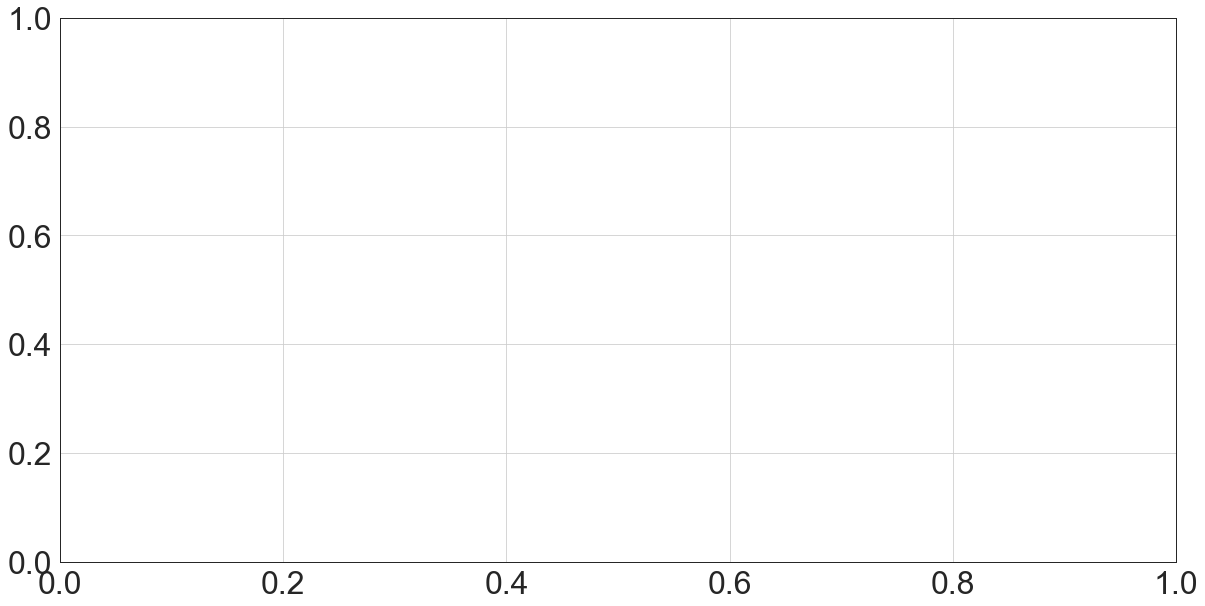

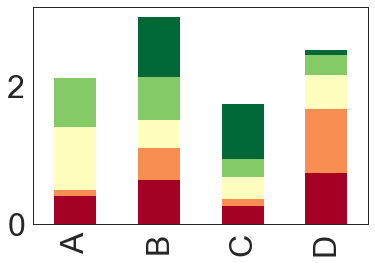

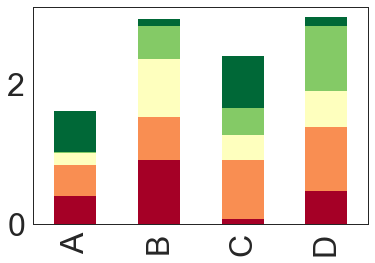

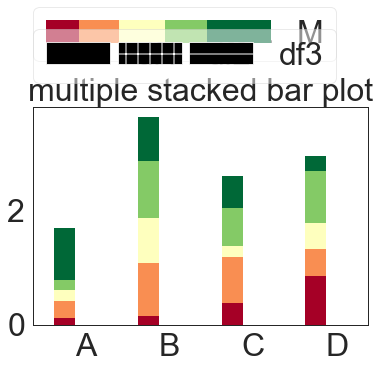

In [88]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", hatch_offset=0, **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots
#         axe.set_visible(False)

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
#                 rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_hatch(hatch_patterns[hatch_offset + int(i/n_col)] * hatch_density)
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="black", hatch=hatch_patterns[hatch_offset+i] * hatch_density))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[0, 1.21],mode = "expand",ncol=n_col)
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[0, 1.11],mode = "expand",ncol=len(labels)) 
    axe.add_artist(l1)
    return axe

# testing plotting function
# create fake dataframes
df1 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df2 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df3 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"], 
                   columns=["I", "J", "K", "L", "M"])

# Then, just call :
plt.figure(figsize=(20,10))
plot_clustered_stacked([df1, df2, df3],["df1", "df2", "df3"],cmap='RdYlGn')
    

### Plot Graph 1(Complete)

<ipython-input-54-ea3161f60723>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axe = plt.subplot(111)


<AxesSubplot:title={'center':'multiple stacked bar plot'}, xlabel='model'>

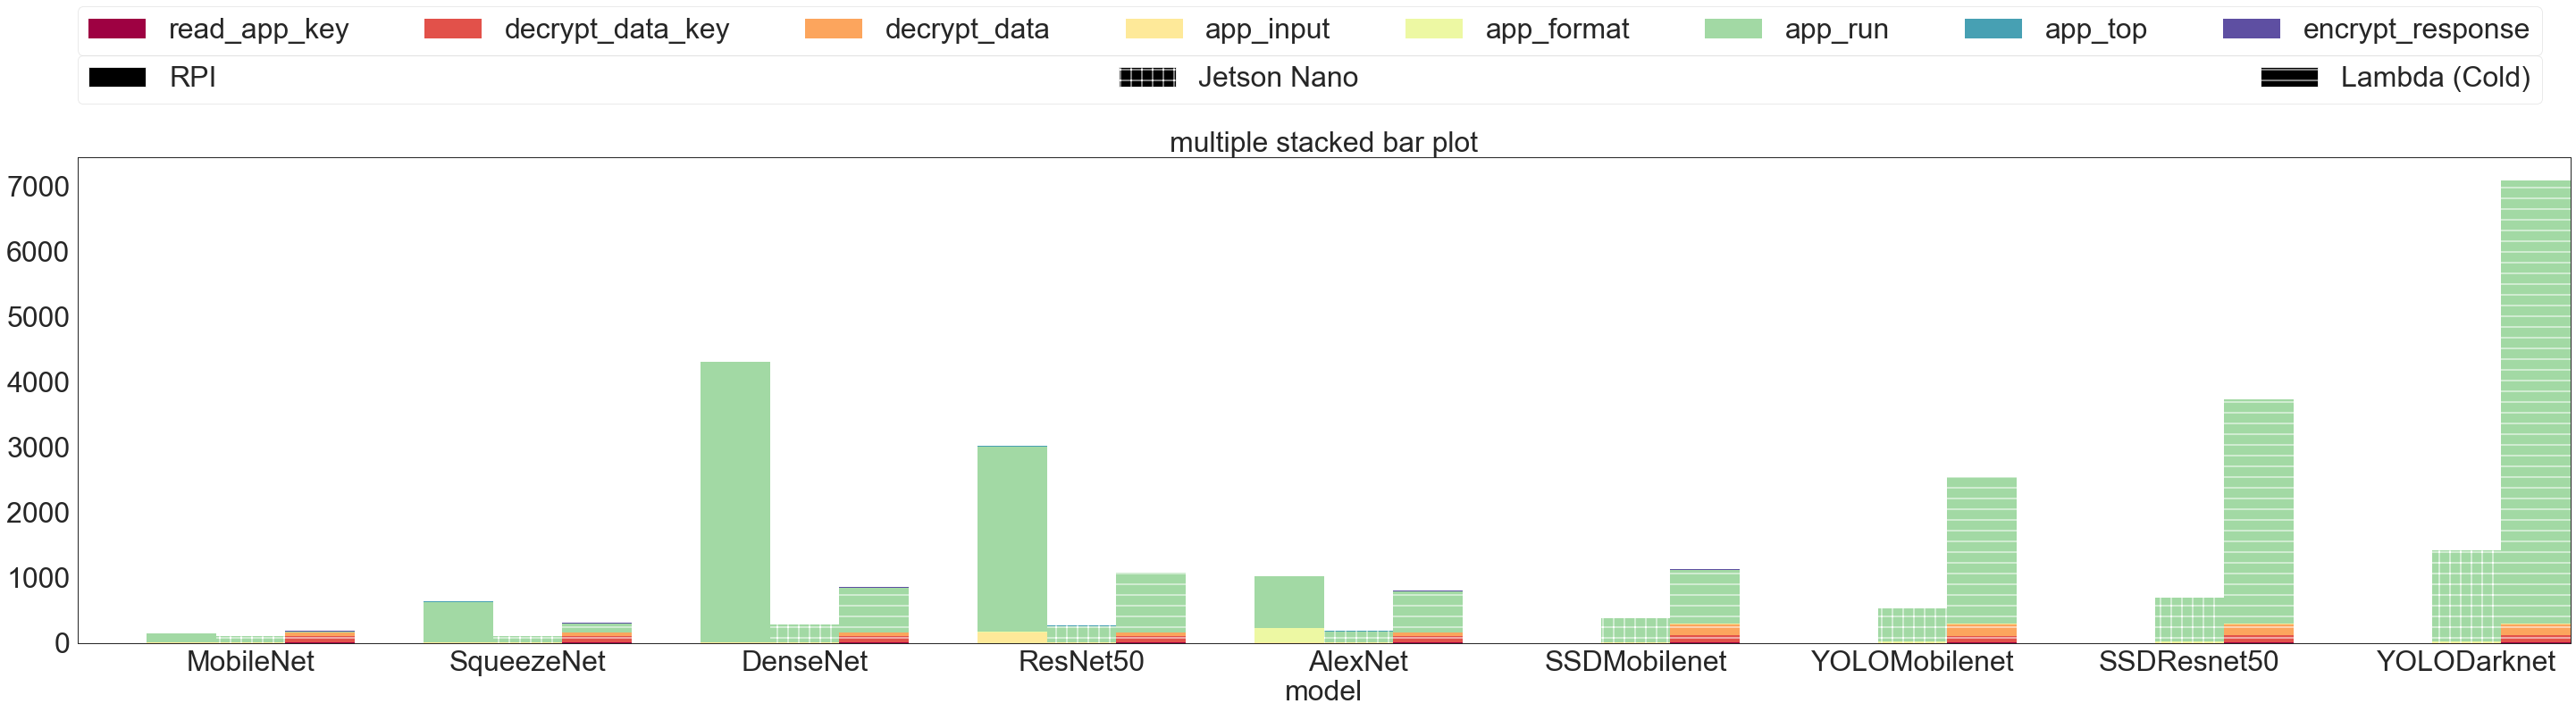

In [56]:
plt.figure(figsize=(50,10))
plt.grid()
plot_clustered_stacked([df_g1_rpi_med, df_g1_jetson_med, df_g1_lambda_warm_med],["RPI", "Jetson Nano", "Lambda (Cold)", "Lambda (Warm)"],cmap='Spectral')


<ipython-input-54-ea3161f60723>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axe = plt.subplot(111)


<AxesSubplot:title={'center':'multiple stacked bar plot'}, xlabel='model'>

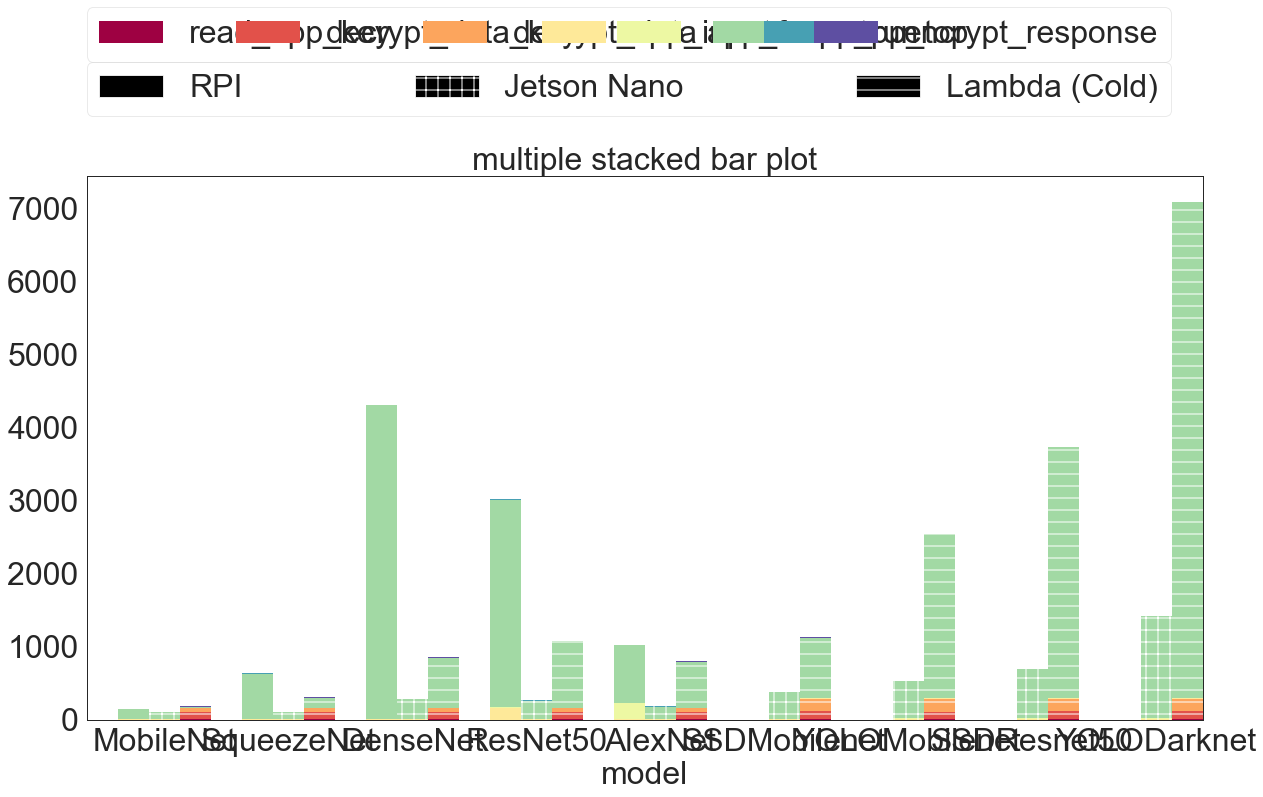

In [57]:
plt.figure(figsize=(20,10))
plt.grid()
plot_clustered_stacked([df_g1_rpi_med, df_g1_jetson_med, df_g1_lambda_warm_med],["RPI", "Jetson Nano", "Lambda (Cold)", "Lambda (Warm)"],cmap='Spectral')


### Plot Graph 1 : Image classification

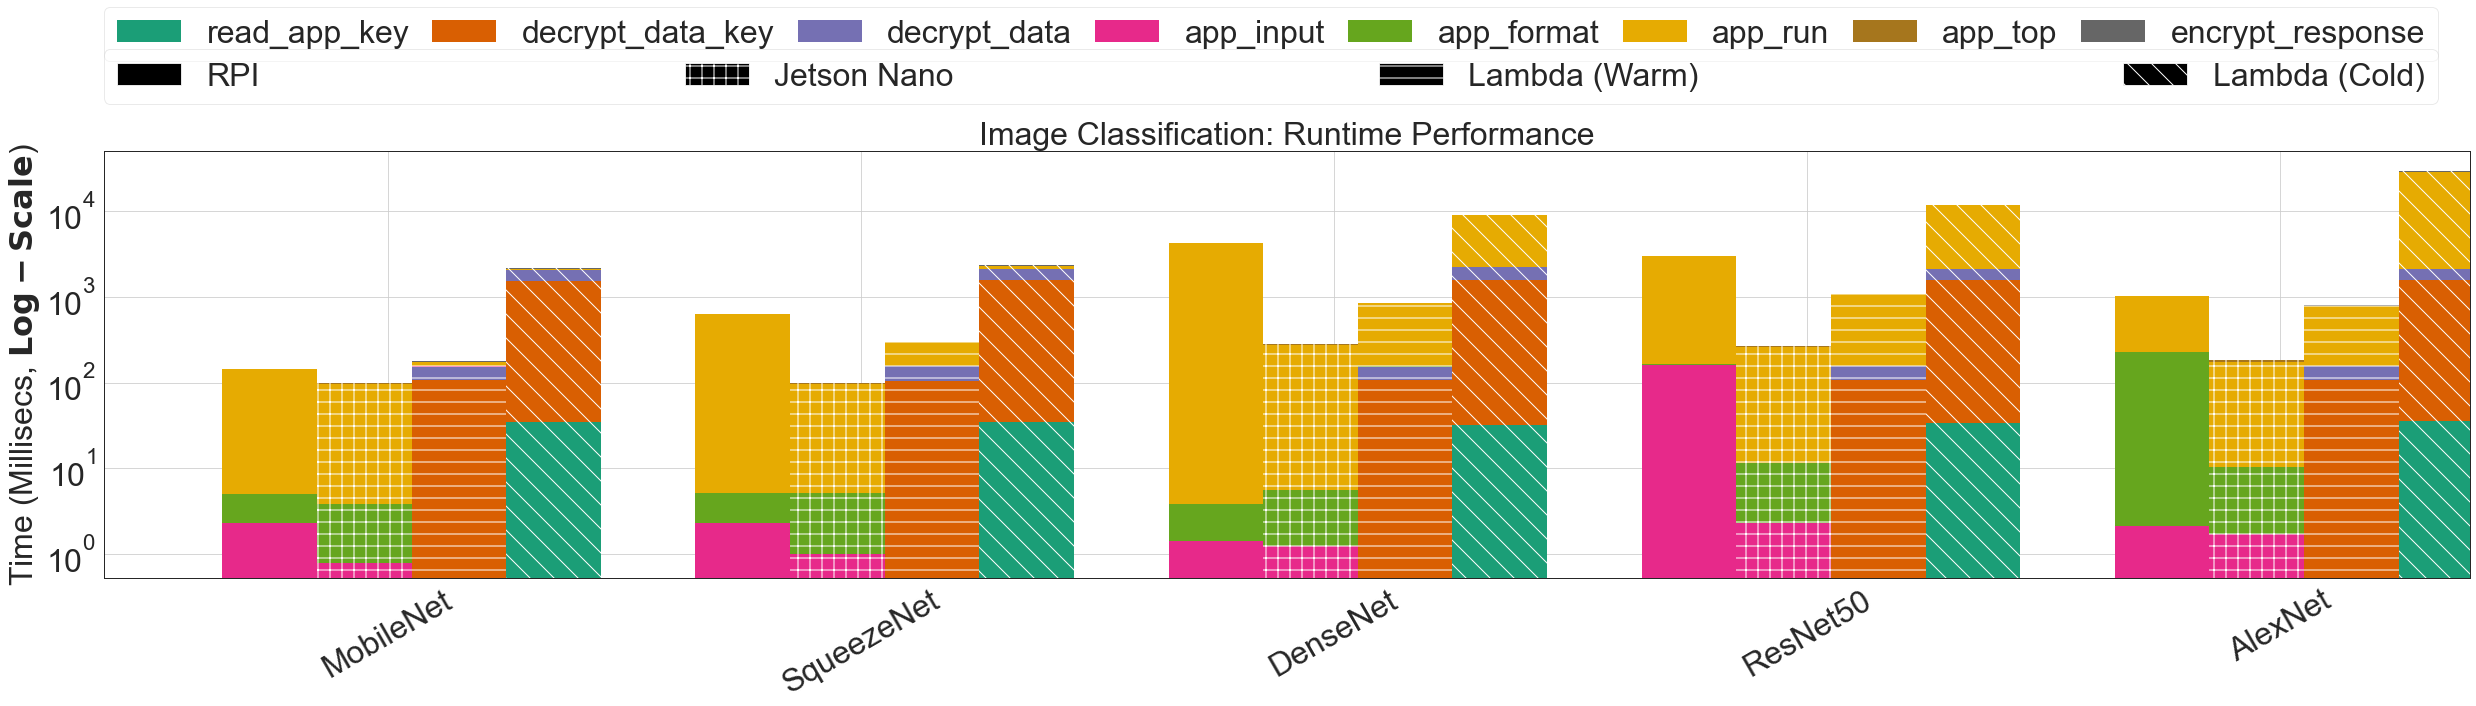

In [66]:
df_g1_rpi_med_ic = df_g1_rpi_med[df_g1_rpi_med.index.isin([model_name_map[x] for x in classif_models])]
df_g1_jetson_med_ic = df_g1_jetson_med[df_g1_jetson_med.index.isin([model_name_map[x] for x in classif_models])]
df_g1_lwarm_med_ic = df_g1_lambda_warm_med[df_g1_lambda_warm_med.index.isin([model_name_map[x] for x in classif_models])]
df_g1_lcold_med_ic = df_g1_lambda_cold_med[df_g1_lambda_cold_med.index.isin([model_name_map[x] for x in classif_models])]
plt.figure(figsize=(35,10))
plot_clustered_stacked([df_g1_rpi_med_ic, df_g1_jetson_med_ic, df_g1_lwarm_med_ic,df_g1_lcold_med_ic],["RPI", "Jetson Nano", "Lambda (Warm)", "Lambda (Cold)"],cmap='Dark2')
plt.grid(True)
plt.title("Image Classification: Runtime Performance")
plt.ylabel(r"Time (Millisecs, $\bf{Log-Scale}$)")
plt.xlabel("")
plt.yscale('log')
plt.xticks(rotation=30)
plt.tight_layout(pad=3)
plt.savefig(f"{plotting_dir}/graph1_legends.png",dpi=300)

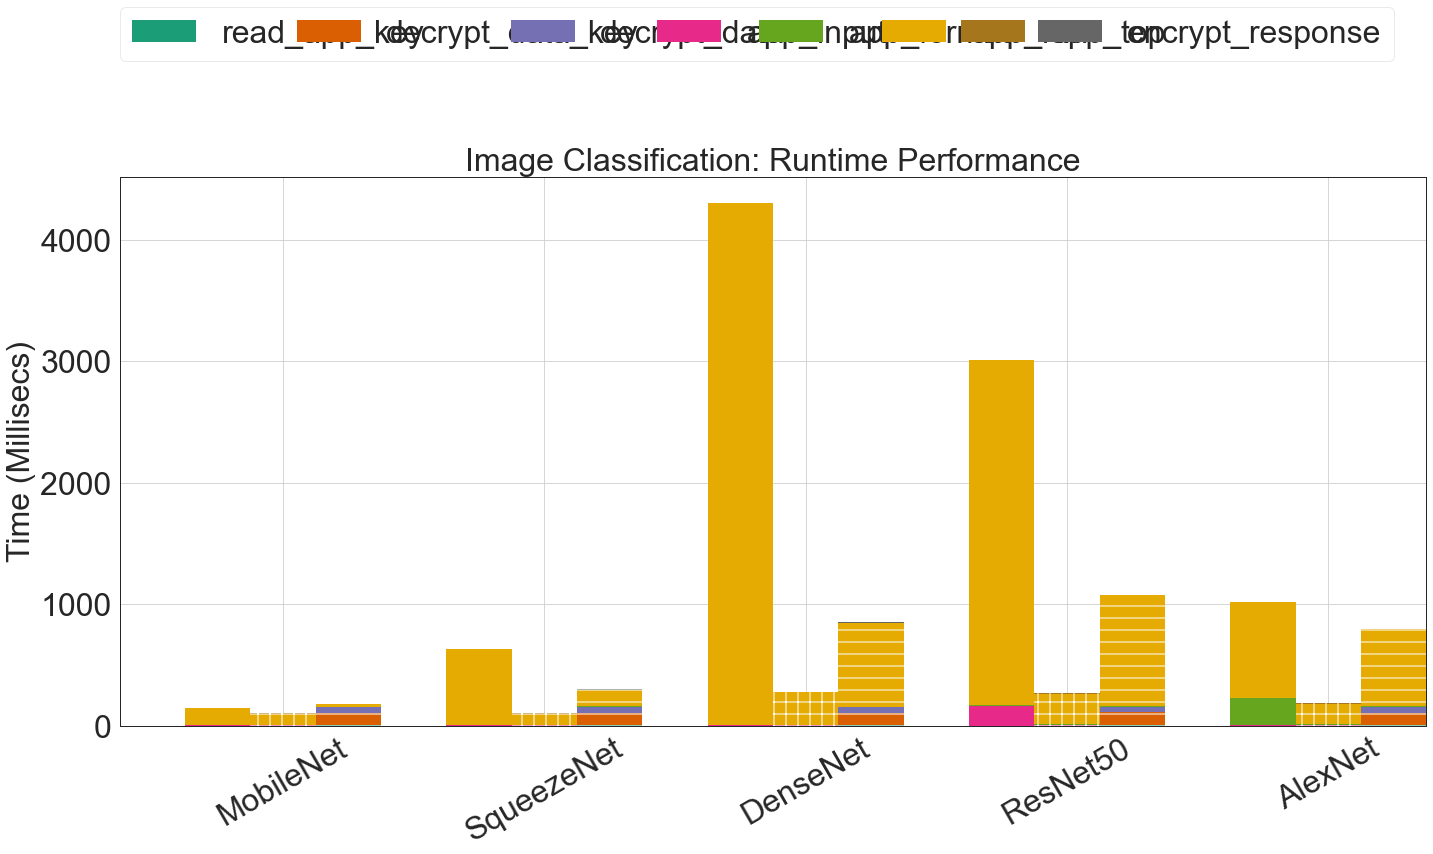

In [86]:
df_g1_rpi_med_ic = df_g1_rpi_med[df_g1_rpi_med.index.isin([model_name_map[x] for x in classif_models])]
df_g1_jetson_med_ic = df_g1_jetson_med[df_g1_jetson_med.index.isin([model_name_map[x] for x in classif_models])]
df_g1_lwarm_med_ic = df_g1_lambda_warm_med[df_g1_lambda_warm_med.index.isin([model_name_map[x] for x in classif_models])]
df_g1_lcold_med_ic = df_g1_lambda_cold_med[df_g1_lambda_cold_med.index.isin([model_name_map[x] for x in classif_models])]
plt.figure(figsize=(20,10))
# plot_clustered_stacked([df_g1_rpi_med_ic, df_g1_jetson_med_ic, df_g1_lwarm_med_ic,df_g1_lcold_med_ic],["RPI", "Jetson Nano", "Lambda (Warm)", "Lambda (Cold)"],cmap='Dark2')
plot_clustered_stacked([df_g1_rpi_med_ic, df_g1_jetson_med_ic, df_g1_lwarm_med_ic],["RPI", "Jetson Nano", "Lambda (Warm)"],cmap='Dark2')
plt.grid(True)
plt.title("Image Classification: Runtime Performance")
# plt.ylabel(r"Time (Millisecs, $\bf{Log-Scale}$)")
plt.ylabel(r"Time (Millisecs)")
plt.gca().legend().set_visible(False)
plt.xlabel("")
# plt.ylim(0,3500)
# plt.yscale('log')
plt.xticks(rotation=30)
plt.tight_layout()
# plt.savefig(f"{plotting_dir}/graph1_image_classification.png",dpi=150)

<AxesSubplot:>

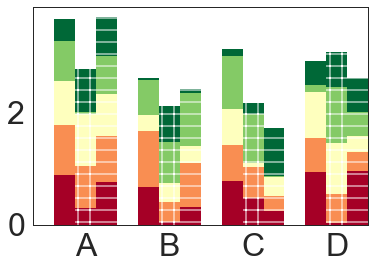

In [99]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_stacked_v2(dfall, axe, labels=None, title="",  H="/", hatch_offset=0, **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
#     axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots
#         axe.set_visible(False)

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
#                 rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_hatch(hatch_patterns[hatch_offset + int(i/n_col)] * hatch_density)
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="black", hatch=hatch_patterns[hatch_offset+i] * hatch_density))

#     l1 = axe.legend(h[:n_col], l[:n_col], loc=[0, 1.21],mode = "expand",ncol=n_col)
#     if labels is not None:
#         l2 = plt.legend(n, labels, loc=[0, 1.11],mode = "expand",ncol=len(labels)) 
#     axe.add_artist(l1)
    return axe

# testing plotting function
# create fake dataframes
df1 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df2 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df3 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"], 
                   columns=["I", "J", "K", "L", "M"])

# Then, just call :
_, ax = plt.subplots(1,1)
plot_clustered_stacked_v2([df1, df2, df3], ax,["df1", "df2", "df3"],cmap='RdYlGn')
    

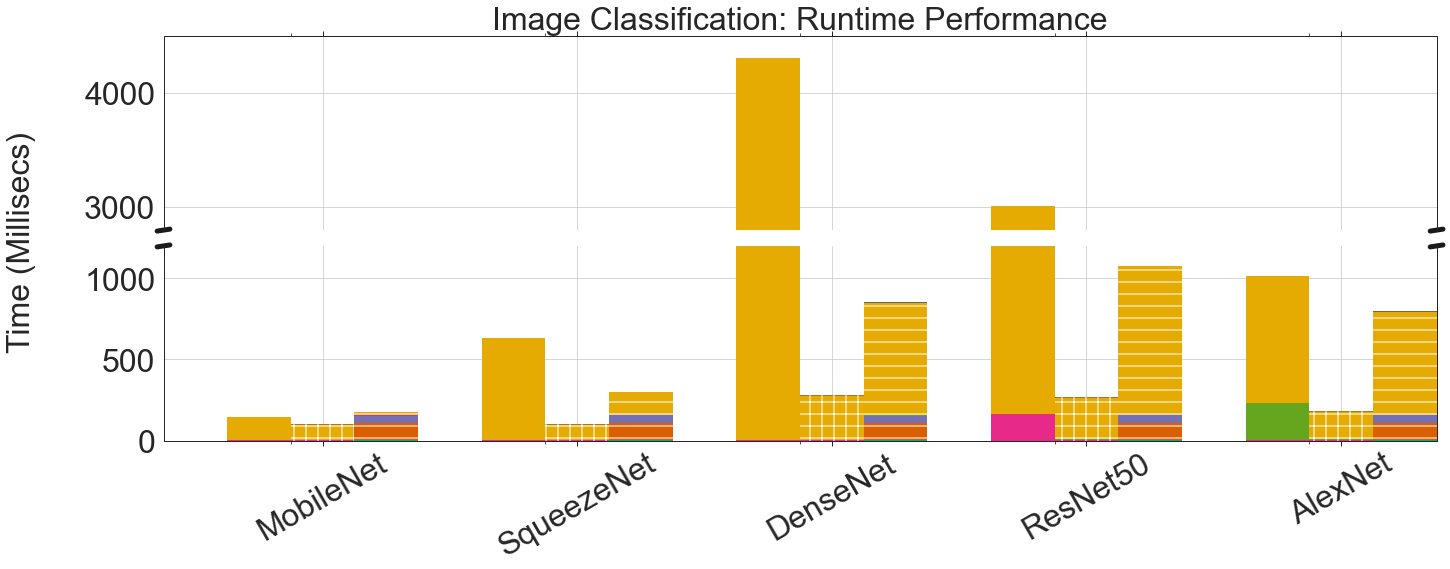

In [111]:
## Broken axis plot
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,8))


# plt.figure(figsize=(20,10))
# plot_clustered_stacked([df_g1_rpi_med_ic, df_g1_jetson_med_ic, df_g1_lwarm_med_ic,df_g1_lcold_med_ic],["RPI", "Jetson Nano", "Lambda (Warm)", "Lambda (Cold)"],cmap='Dark2')
plot_clustered_stacked_v2([df_g1_rpi_med_ic, df_g1_jetson_med_ic, df_g1_lwarm_med_ic],ax1,["RPI", "Jetson Nano", "Lambda (Warm)"],cmap='Dark2')
plot_clustered_stacked_v2([df_g1_rpi_med_ic, df_g1_jetson_med_ic, df_g1_lwarm_med_ic],ax2,["RPI", "Jetson Nano", "Lambda (Warm)"],cmap='Dark2')

ax1.set_ylim(2800, 4500)
ax2.set_ylim(0, 1200)


# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

ax1.grid(True)
ax2.grid(True)

# Add diagonal cuts

d = .005  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# plt.grid(True)
# plt.title("Image Classification: Runtime Performance")
# plt.ylabel(r"Time (Millisecs, $\bf{Log-Scale}$)")
plt.ylabel(r"Time (Millisecs)")
ax2.yaxis.set_label_coords(-0.1,1.02)
ax1.set_title("Image Classification: Runtime Performance")
plt.gca().legend().set_visible(False)
plt.xlabel("")
# plt.ylim(0,3500)
# plt.yscale('log')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig(f"{plotting_dir}/graph1_broken_image_classification.png",dpi=150)

In [70]:
df_g1_lambda_warm_med

,read_app_key,decrypt_data_key,decrypt_data,app_input,app_format,app_run,app_top,encrypt_response
model,,,,,,,,
MobileNet,0.465969,105.942408,47.465969,0.943932,0.487162,17.783194,0.028492,5.643979
SqueezeNet,0.434555,105.350785,49.575916,0.934565,0.548906,139.390293,0.038450,5.575916
DenseNet,0.455497,105.602094,47.094241,0.914974,0.458257,691.809351,0.033440,5.408377
ResNet50,0.528796,106.633508,48.361257,0.754131,0.477173,916.447911,0.034424,5.513089
AlexNet,0.523560,106.539267,48.188482,0.920560,0.546047,635.397529,0.036120,5.628272
SSDMobilenet,0.434555,111.732984,173.073298,8.250246,2.058476,825.713665,0.000000,5.162304
YOLOMobilenet,0.623037,108.633508,173.460733,9.083068,2.314927,2248.037419,0.000000,4.916230
SSDResnet50,0.518325,110.240838,174.335079,8.884717,2.344707,3432.737958,0.000000,4.926702
YOLODarknet,0.450262,112.209424,172.298429,9.188141,2.310225,6791.431063,0.000000,4.926702


In [71]:
df_g1_jetson_med

,read_app_key,decrypt_data_key,decrypt_data,app_input,app_format,app_run,app_top,encrypt_response
model,,,,,,,,
MobileNet,0,0,0,0.780642,3.006623,93.472781,2.039833,0
SqueezeNet,0,0,0,0.982783,4.101241,91.615934,2.283137,0
DenseNet,0,0,0,1.217949,4.402530,269.072225,4.519489,0
ResNet50,0,0,0,2.263308,9.099281,248.516335,11.037390,0
AlexNet,0,0,0,1.716306,8.727741,165.654156,8.499572,0
SSDMobilenet,0,0,0,5.363996,5.934098,366.672232,0.000000,0
YOLOMobilenet,0,0,0,7.317414,8.100696,511.854005,0.000000,0
SSDResnet50,0,0,0,6.270099,12.892134,677.483203,0.000000,0
YOLODarknet,0,0,0,7.182353,11.900127,1401.502848,0.000000,0


### Plot Object Detection Models

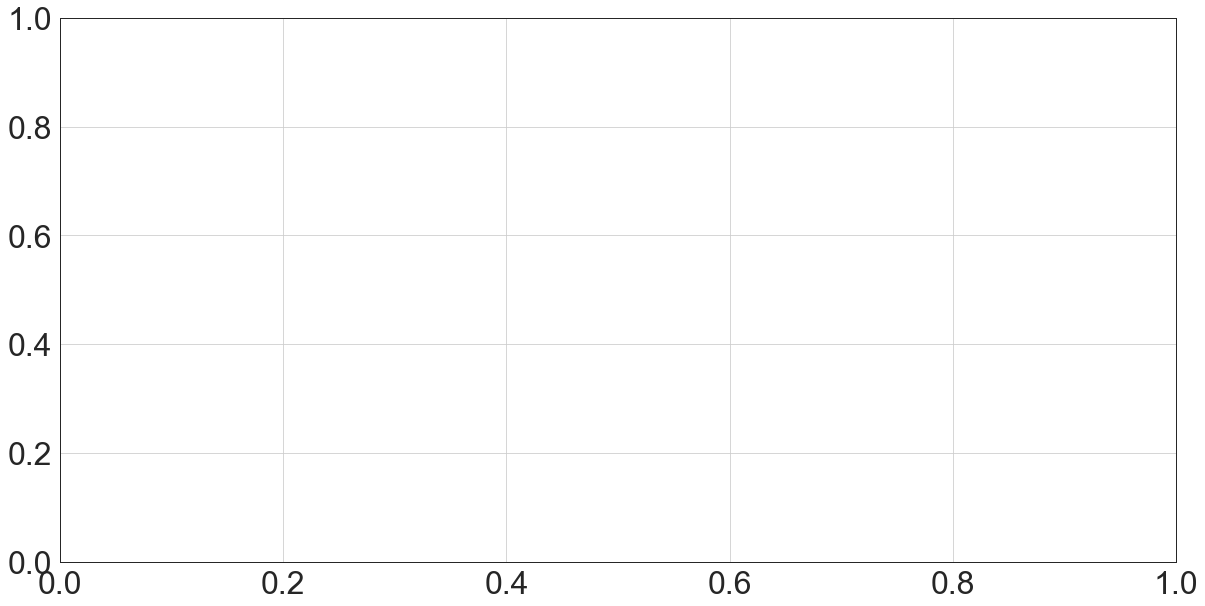

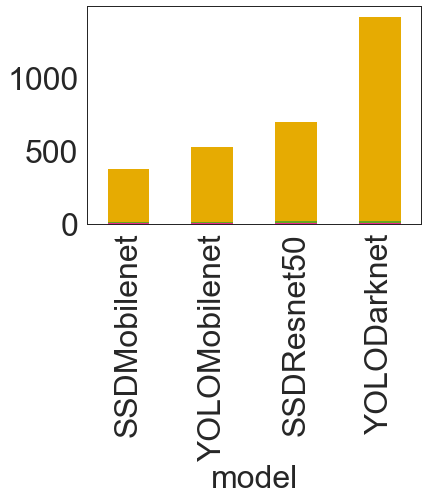

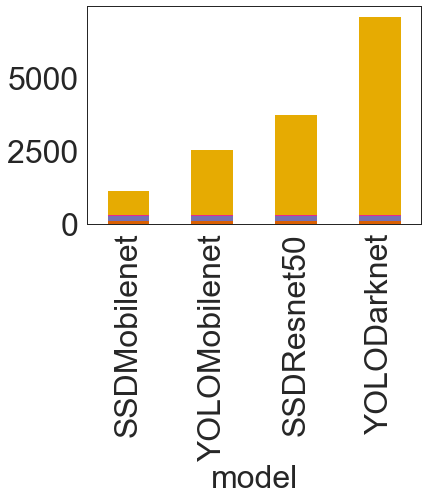

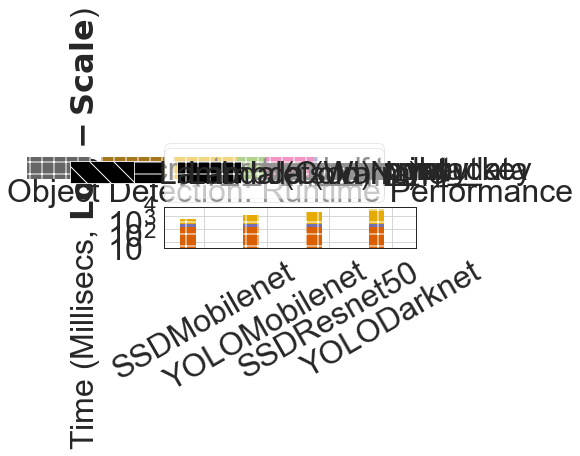

In [132]:
df_g1_jetson_med_od = df_g1_jetson_med[df_g1_jetson_med.index.isin([model_name_map[x] for x in detect_models])]
df_g1_lwarm_med_od = df_g1_lambda_warm_med[df_g1_lambda_warm_med.index.isin([model_name_map[x] for x in detect_models])]
df_g1_lcold_med_od = df_g1_lambda_cold_med[df_g1_lambda_cold_med.index.isin([model_name_map[x] for x in detect_models])]
plt.figure(figsize=(20,10))
plot_clustered_stacked([df_g1_jetson_med_od, df_g1_lwarm_med_od,df_g1_lcold_med_od],["Jetson Nano", "Lambda (Warm)", "Lambda (Cold)"],cmap='Dark2',
                      hatch_offset=1)
plt.grid(True)
plt.title("Object Detection: Runtime Performance")
plt.ylabel(r"Time (Millisecs, $\bf{Log-Scale}$)")
plt.yscale('log')
plt.xticks(rotation=30)
plt.xlabel("")
plt.tight_layout()
plt.savefig(f"{plotting_dir}/graph1_object_detection.png",dpi=150)

## Draw Stacked Multiple Bar plot(Merged)

### Get Mean Data

In [130]:
local_columns = ['app_input','app_format','app_run,','app_top']
remote_columns = ['app_input','app_format','app_tvm,','app_top','wrapper_decrypt_key', 'wrapper_decrypt_data','wrapper_encrypt_response']
df_g1_lambda_cold

# ['app_input','app_format'] <-  'data_injest'
# ['read_app_key','decrypt_datakey','decrypt_data'] <- 'data_decryption'
# ['app_run','app_top','encrypt_response'] <- 'app_execution'

# Include border for the bar
# app_exec <- empty
# data_injest <-  '/'
# data_decrypt <- 'x'
# distinguish between runtime with colors
# add comparison between cold and warm(new graph, merged for classification and detection)

,sid,tid,invoke_time,app_input,app_format,app_tvm,app_top,wrapper_app,wrapper_appkey,wrapper_decrypt_key,wrapper_decrypt_data,wrapper_encrypt_response,total_time,model
0,0,0,20210702_150758,1.135,0.778,7073.153,0.034,7129,37,1641,617,35,12273.697853,DenseNet
1,0,0,20210703_160043,1.247,0.958,9797.549,0.033,9852,32,1512,602,25,14686.141491,ResNet50
2,0,0,20210702_150821,1.081,0.753,9679.112,0.032,9730,31,1485,544,37,14829.249144,ResNet50
3,0,0,20210630_021059,1.019,0.765,6771.215,0.033,6819,35,1522,721,23,11642.870903,DenseNet
4,0,0,20210703_094806,14.581,2.749,17764.001,-1.000,17833,32,1525,598,25,22921.751022,SSDResnet50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0,0,20210704_063624,12.112,2.295,10279.781,-1.000,10345,32,1632,1224,29,16020.710945,YOLOMobilenet
212,0,0,20210630_021614,1.236,0.932,27249.500,0.053,27306,31,1501,500,33,33046.717882,AlexNet
213,0,0,20210702_170655,1.110,0.811,27027.876,0.037,27088,37,1553,1006,29,33937.822104,AlexNet
214,0,0,20210702_232259,12.168,2.384,10207.351,-1.000,10271,35,1461,1193,20,16306.174278,YOLOMobilenet


In [117]:
# get mean values
df_g1_rpi_med = df_g1_rpi.groupby('model')['app_model','app_input','app_format','app_run','app_top'].mean()
df_g1_jetson_med = df_g1_jetson.groupby('model')['app_model','app_input','app_format','app_run','app_top'].mean()
df_g1_lambda_cold_med = df_g1_lambda_cold.groupby('model')['app_input','app_format','app_tvm','app_top','wrapper_appkey','wrapper_decrypt_key', 'wrapper_decrypt_data','wrapper_encrypt_response'].mean()
df_g1_lambda_warm_med = df_g1_lambda_warm.groupby('model')['app_input','app_format','app_tvm','app_top','wrapper_appkey','wrapper_decrypt_key', 'wrapper_decrypt_data','wrapper_encrypt_response'].mean()

<ipython-input-117-0c4957e2c78c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_g1_rpi_med = df_g1_rpi.groupby('model')['app_model','app_input','app_format','app_run','app_top'].mean()
<ipython-input-117-0c4957e2c78c>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_g1_jetson_med = df_g1_jetson.groupby('model')['app_model','app_input','app_format','app_run','app_top'].mean()
<ipython-input-117-0c4957e2c78c>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_g1_lambda_cold_med = df_g1_lambda_cold.groupby('model')['app_input','app_format','app_tvm','app_top','wrapper_appkey','wrapper_decrypt_key', 'wrapper_decrypt_data','wrapper_encrypt_response'].mean()
<ipython-input-117-0c4957e2c78c>:5: FutureWarning: Indexing with multiple keys (implici

In [118]:
df_g1_lambda_cold_med

,app_input,app_format,app_tvm,app_top,wrapper_appkey,wrapper_decrypt_key,wrapper_decrypt_data,wrapper_encrypt_response
model,,,,,,,,
AlexNet,1.185417,0.846458,27092.207375,0.035667,35.333333,1543.208333,571.958333,31.958333
DenseNet,1.136458,0.815208,6870.280792,0.033458,32.125000,1536.958333,681.375000,30.916667
MobileNet,1.202708,0.833875,40.681500,0.028667,34.375000,1492.500000,558.416667,32.625000
ResNet50,1.178333,0.845583,9732.551208,0.033042,33.541667,1545.500000,554.125000,31.125000
SSDMobilenet,12.809708,2.519458,3788.613708,-1.000000,34.541667,1503.625000,730.958333,25.333333
SSDResnet50,13.444167,2.469875,17734.777208,-1.000000,33.958333,1496.666667,806.333333,27.250000
SqueezeNet,1.184500,0.843667,193.943208,0.037250,34.291667,1526.250000,549.541667,32.416667
YOLODarknet,12.984750,2.444875,33641.491750,-1.000000,33.625000,1518.125000,724.375000,26.666667
YOLOMobilenet,13.800958,2.495083,10379.020333,-1.000000,35.291667,1518.000000,763.125000,26.375000


In [119]:
df_g1_lambda_warm_med

,app_input,app_format,app_tvm,app_top,wrapper_appkey,wrapper_decrypt_key,wrapper_decrypt_data,wrapper_encrypt_response
model,,,,,,,,
AlexNet,0.920560,0.546047,635.397529,0.036120,0.523560,106.539267,48.188482,5.628272
DenseNet,0.914974,0.458257,691.809351,0.033440,0.455497,105.602094,47.094241,5.408377
MobileNet,0.943932,0.487162,17.783194,0.028492,0.465969,105.942408,47.465969,5.643979
ResNet50,0.754131,0.477173,916.447911,0.034424,0.528796,106.633508,48.361257,5.513089
SSDMobilenet,8.250246,2.058476,825.713665,-1.000000,0.434555,111.732984,173.073298,5.162304
SSDResnet50,8.884717,2.344707,3432.737958,-1.000000,0.518325,110.240838,174.335079,4.926702
SqueezeNet,0.934565,0.548906,139.390293,0.038450,0.434555,105.350785,49.575916,5.575916
YOLODarknet,9.188141,2.310225,6791.431063,-1.000000,0.450262,112.209424,172.298429,4.926702
YOLOMobilenet,9.083068,2.314927,2248.037419,-1.000000,0.623037,108.633508,173.460733,4.916230


In [120]:
df_g1_rpi_med

,app_model,app_input,app_format,app_run,app_top
model,,,,,
AlexNet,137.652587,0.002121,0.228503,0.785629,0.001101
DenseNet,26.882012,0.001396,0.002392,4.300932,0.001407
MobileNet,0.288660,0.002311,0.002628,0.139587,0.001121
ResNet50,23.709215,0.162459,0.002918,2.847871,0.001192
SqueezeNet,1.740510,0.002304,0.002887,0.624125,0.001185


In [121]:
df_g1_jetson_med

,app_model,app_input,app_format,app_run,app_top
model,,,,,
AlexNet,33.577507,0.001716,0.008728,0.165654,0.008500
DenseNet,21.952944,0.001218,0.004403,0.269072,0.004519
MobileNet,27.537124,0.000781,0.003007,0.093473,0.002040
ResNet50,31.432530,0.002263,0.009099,0.248516,0.011037
SSDMobilenet,28.565162,0.005364,0.005934,0.366672,0.002419
SSDResnet50,29.650896,0.006270,0.012892,0.677483,0.003087
SqueezeNet,23.160721,0.000983,0.004101,0.091616,0.002283
YOLODarknet,31.614636,0.007182,0.011900,1.401503,0.005013
YOLOMobilenet,29.037139,0.007317,0.008101,0.511854,0.004416


### Ready data for plotting

In [122]:
df_g1_lambda_warm_med = df_g1_lambda_warm_med.rename(columns= {
    'wrapper_appkey':'read_app_key',
    'wrapper_decrypt_key':'decrypt_data_key',
    'wrapper_decrypt_data':'decrypt_data',
    'wrapper_encrypt_response':'encrypt_response',
    'app_tvm':'app_run',
    
})

df_g1_lambda_cold_med = df_g1_lambda_cold_med.rename(columns= {
    'wrapper_appkey':'read_app_key',
    'wrapper_decrypt_key':'decrypt_data_key',
    'wrapper_decrypt_data':'decrypt_data',
    'wrapper_encrypt_response':'encrypt_response',
    'app_tvm':'app_run',
    
})

In [123]:
df_g1_rpi_med['read_app_key'] = 0
df_g1_rpi_med['decrypt_data_key'] = 0
df_g1_rpi_med['decrypt_data'] = 0
df_g1_rpi_med['encrypt_response'] = 0

df_g1_jetson_med['read_app_key'] = 0
df_g1_jetson_med['decrypt_data_key'] = 0
df_g1_jetson_med['decrypt_data'] = 0
df_g1_jetson_med['encrypt_response'] = 0



In [124]:
# Remove app top times from all detection models, and zero rows to rpi eval
for model in ['SSDMobilenet','SSDResnet50','YOLODarknet','YOLOMobilenet']:
    df_g1_lambda_warm_med.loc[model,'app_top'] = 0
    df_g1_lambda_cold_med.loc[model,'app_top'] = 0
    df_g1_jetson_med.loc[model,'app_top'] = 0
    df_g1_rpi_med.loc[model,:] = 0
    

In [125]:
# Convert Jetson and RPi numbesrs into miliseconds
df_g1_rpi_med = df_g1_rpi_med*1000
df_g1_jetson_med = df_g1_jetson_med*1000

df_g1_rpi_med = df_g1_rpi_med.drop('app_model',axis=1)
df_g1_jetson_med = df_g1_jetson_med.drop('app_model',axis=1)

In [126]:
df_g1_lambda_cold_med

,app_input,app_format,app_run,app_top,read_app_key,decrypt_data_key,decrypt_data,encrypt_response
model,,,,,,,,
AlexNet,1.185417,0.846458,27092.207375,0.035667,35.333333,1543.208333,571.958333,31.958333
DenseNet,1.136458,0.815208,6870.280792,0.033458,32.125000,1536.958333,681.375000,30.916667
MobileNet,1.202708,0.833875,40.681500,0.028667,34.375000,1492.500000,558.416667,32.625000
ResNet50,1.178333,0.845583,9732.551208,0.033042,33.541667,1545.500000,554.125000,31.125000
SSDMobilenet,12.809708,2.519458,3788.613708,0.000000,34.541667,1503.625000,730.958333,25.333333
SSDResnet50,13.444167,2.469875,17734.777208,0.000000,33.958333,1496.666667,806.333333,27.250000
SqueezeNet,1.184500,0.843667,193.943208,0.037250,34.291667,1526.250000,549.541667,32.416667
YOLODarknet,12.984750,2.444875,33641.491750,0.000000,33.625000,1518.125000,724.375000,26.666667
YOLOMobilenet,13.800958,2.495083,10379.020333,0.000000,35.291667,1518.000000,763.125000,26.375000


In [127]:
# order index and columns
columns_order = ['read_app_key','decrypt_data_key','decrypt_data','app_input', 'app_format', 'app_run', 'app_top' ,'encrypt_response']
index_order = np.array(['MobileNet','SqueezeNet','DenseNet', 'ResNet50','AlexNet', 'YOLOMobilenet', 'SSDMobilenet', 'SSDResnet50', 'YOLODarknet'])

df_g1_rpi_med['model'] = df_g1_rpi_med.index
df_g1_rpi_med['model_order'] = df_g1_rpi_med['model'].apply(lambda x: model_name_order[x])
df_g1_rpi_med = df_g1_rpi_med.sort_values(by='model_order')
df_g1_rpi_med = df_g1_rpi_med.drop(['model','model_order'],axis=1)
df_g1_rpi_med = df_g1_rpi_med[columns_order]

df_g1_jetson_med['model'] = df_g1_jetson_med.index
df_g1_jetson_med['model_order'] = df_g1_jetson_med['model'].apply(lambda x: model_name_order[x])
df_g1_jetson_med = df_g1_jetson_med.sort_values(by='model_order')
df_g1_jetson_med = df_g1_jetson_med.drop(['model','model_order'],axis=1)
df_g1_jetson_med = df_g1_jetson_med[columns_order]


df_g1_lambda_cold_med['model'] = df_g1_lambda_cold_med.index
df_g1_lambda_cold_med['model_order'] = df_g1_lambda_cold_med['model'].apply(lambda x: model_name_order[x])
df_g1_lambda_cold_med = df_g1_lambda_cold_med.sort_values(by='model_order')
df_g1_lambda_cold_med = df_g1_lambda_cold_med.drop(['model','model_order'],axis=1)
df_g1_lambda_cold_med = df_g1_lambda_cold_med[columns_order]

df_g1_lambda_warm_med['model'] = df_g1_lambda_warm_med.index
df_g1_lambda_warm_med['model_order'] = df_g1_lambda_warm_med['model'].apply(lambda x: model_name_order[x])
df_g1_lambda_warm_med = df_g1_lambda_warm_med.sort_values(by='model_order')
df_g1_lambda_warm_med = df_g1_lambda_warm_med.drop(['model','model_order'],axis=1)
df_g1_lambda_warm_med = df_g1_lambda_warm_med[columns_order]


### Plotting Function

### Plot Graph 1 : Image classification

In [128]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_stacked_v2(dfall, axe, labels=None, title="",  H="/", hatch_offset=0, **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
#     axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots
#         axe.set_visible(False)

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
#                 rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_hatch(hatch_patterns[hatch_offset + int(i/n_col)] * hatch_density)
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="black", hatch=hatch_patterns[hatch_offset+i] * hatch_density))

#     l1 = axe.legend(h[:n_col], l[:n_col], loc=[0, 1.21],mode = "expand",ncol=n_col)
#     if labels is not None:
#         l2 = plt.legend(n, labels, loc=[0, 1.11],mode = "expand",ncol=len(labels)) 
#     axe.add_artist(l1)
    return axe

# testing plotting function
# create fake dataframes
# df1 = pd.DataFrame(np.random.rand(4, 5),
#                    index=["A", "B", "C", "D"],
#                    columns=["I", "J", "K", "L", "M"])
# df2 = pd.DataFrame(np.random.rand(4, 5),
#                    index=["A", "B", "C", "D"],
#                    columns=["I", "J", "K", "L", "M"])
# df3 = pd.DataFrame(np.random.rand(4, 5),
#                    index=["A", "B", "C", "D"], 
#                    columns=["I", "J", "K", "L", "M"])

# Then, just call :
# _, ax = plt.subplots(1,1)
# plot_clustered_stacked_v2([df1, df2, df3], ax,["df1", "df2", "df3"],cmap='RdYlGn')
    

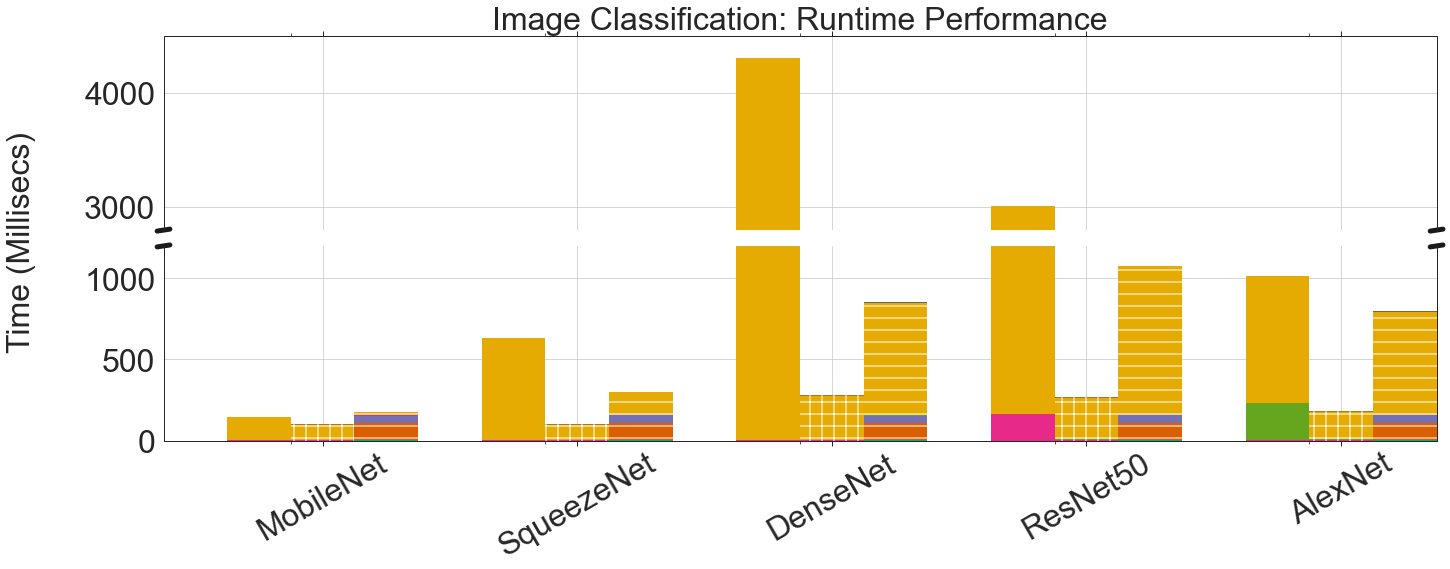

In [129]:
## Broken axis plot
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,8))


# plt.figure(figsize=(20,10))
# plot_clustered_stacked([df_g1_rpi_med_ic, df_g1_jetson_med_ic, df_g1_lwarm_med_ic,df_g1_lcold_med_ic],["RPI", "Jetson Nano", "Lambda (Warm)", "Lambda (Cold)"],cmap='Dark2')
plot_clustered_stacked_v2([df_g1_rpi_med_ic, df_g1_jetson_med_ic, df_g1_lwarm_med_ic],ax1,["RPI", "Jetson Nano", "Lambda (Warm)"],cmap='Dark2')
plot_clustered_stacked_v2([df_g1_rpi_med_ic, df_g1_jetson_med_ic, df_g1_lwarm_med_ic],ax2,["RPI", "Jetson Nano", "Lambda (Warm)"],cmap='Dark2')

ax1.set_ylim(2800, 4500)
ax2.set_ylim(0, 1200)


# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

ax1.grid(True)
ax2.grid(True)

# Add diagonal cuts

d = .005  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# plt.grid(True)
# plt.title("Image Classification: Runtime Performance")
# plt.ylabel(r"Time (Millisecs, $\bf{Log-Scale}$)")
plt.ylabel(r"Time (Millisecs)")
ax2.yaxis.set_label_coords(-0.1,1.02)
ax1.set_title("Image Classification: Runtime Performance")
plt.gca().legend().set_visible(False)
plt.xlabel("")
# plt.ylim(0,3500)
# plt.yscale('log')
plt.xticks(rotation=30)
plt.tight_layout()
# plt.savefig(f"{plotting_dir}/graph1_broken_image_classification.png",dpi=150)

In [70]:
df_g1_lambda_warm_med

,read_app_key,decrypt_data_key,decrypt_data,app_input,app_format,app_run,app_top,encrypt_response
model,,,,,,,,
MobileNet,0.465969,105.942408,47.465969,0.943932,0.487162,17.783194,0.028492,5.643979
SqueezeNet,0.434555,105.350785,49.575916,0.934565,0.548906,139.390293,0.038450,5.575916
DenseNet,0.455497,105.602094,47.094241,0.914974,0.458257,691.809351,0.033440,5.408377
ResNet50,0.528796,106.633508,48.361257,0.754131,0.477173,916.447911,0.034424,5.513089
AlexNet,0.523560,106.539267,48.188482,0.920560,0.546047,635.397529,0.036120,5.628272
SSDMobilenet,0.434555,111.732984,173.073298,8.250246,2.058476,825.713665,0.000000,5.162304
YOLOMobilenet,0.623037,108.633508,173.460733,9.083068,2.314927,2248.037419,0.000000,4.916230
SSDResnet50,0.518325,110.240838,174.335079,8.884717,2.344707,3432.737958,0.000000,4.926702
YOLODarknet,0.450262,112.209424,172.298429,9.188141,2.310225,6791.431063,0.000000,4.926702


In [71]:
df_g1_jetson_med

,read_app_key,decrypt_data_key,decrypt_data,app_input,app_format,app_run,app_top,encrypt_response
model,,,,,,,,
MobileNet,0,0,0,0.780642,3.006623,93.472781,2.039833,0
SqueezeNet,0,0,0,0.982783,4.101241,91.615934,2.283137,0
DenseNet,0,0,0,1.217949,4.402530,269.072225,4.519489,0
ResNet50,0,0,0,2.263308,9.099281,248.516335,11.037390,0
AlexNet,0,0,0,1.716306,8.727741,165.654156,8.499572,0
SSDMobilenet,0,0,0,5.363996,5.934098,366.672232,0.000000,0
YOLOMobilenet,0,0,0,7.317414,8.100696,511.854005,0.000000,0
SSDResnet50,0,0,0,6.270099,12.892134,677.483203,0.000000,0
YOLODarknet,0,0,0,7.182353,11.900127,1401.502848,0.000000,0


### Plot Object Detection Models

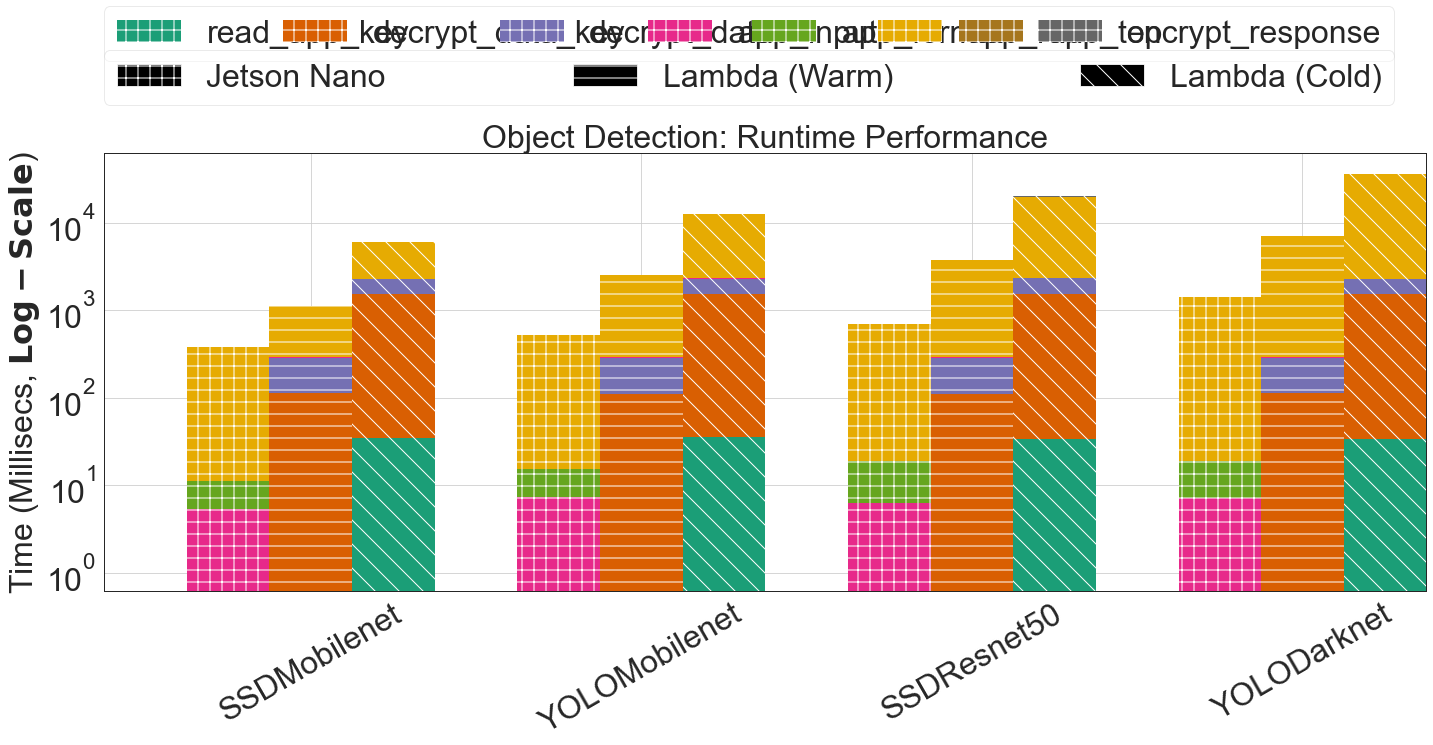

In [69]:
df_g1_jetson_med_od = df_g1_jetson_med[df_g1_jetson_med.index.isin([model_name_map[x] for x in detect_models])]
df_g1_lwarm_med_od = df_g1_lambda_warm_med[df_g1_lambda_warm_med.index.isin([model_name_map[x] for x in detect_models])]
df_g1_lcold_med_od = df_g1_lambda_cold_med[df_g1_lambda_cold_med.index.isin([model_name_map[x] for x in detect_models])]
plt.figure(figsize=(20,10))
plot_clustered_stacked([df_g1_jetson_med_od, df_g1_lwarm_med_od,df_g1_lcold_med_od],["Jetson Nano", "Lambda (Warm)", "Lambda (Cold)"],cmap='Dark2',
                      hatch_offset=1)
plt.grid(True)
plt.title("Object Detection: Runtime Performance")
plt.ylabel(r"Time (Millisecs, $\bf{Log-Scale}$)")
plt.yscale('log')
plt.xticks(rotation=30)
plt.xlabel("")
plt.tight_layout()
plt.savefig(f"{plotting_dir}/graph1_object_detection.png",dpi=150)

# Graph 2: Encryption Timed(RPI, jetson)

In [195]:
rpi_folder = f'{data_dir}/Graph 2/RPI'
df_g2_rpi=None

for file in glob.glob(f"{rpi_folder}/*"):
    df_model = pd.read_csv(file)
    df_model['file'] = file
    if df_g2_rpi is None:
        df_g2_rpi=df_model.copy(deep=True)
    else:
        df_g2_rpi = pd.concat([df_g2_rpi, df_model],ignore_index=True)
df_g2_rpi

,uuid,invocation_timestr,invocation_timestamp,receive_timestr,receive_timestamp,runtime,app_model,app_input,app_format,app_run,app_top,wrapper_app,wrapper_appkey,wrapper_decrypt_key,wrapper_decrypt_data,wrapper_encrypt_response,total_time,encryption_time,lambda_time,file
0,c30dcbc6-b431-45b0-a6ee-ede72b5a5a31,20210705_202203,1625512923,20210705_202334,1625513014,lambda,-1,14.780,2.540,3804.508,-1.0,3902,37,1506,667,25,8924.128294,78.673273,12.060045,Final_Evaluation_Data/Graph 2/RPI/exp_detect_h...
1,c34c4db7-ea71-43df-bb5c-fe2061e7bf0e,20210705_202207,1625512927,20210705_202701,1625513221,lambda,-1,8.253,2.200,861.071,-1.0,880,1,306,223,5,4027.786016,286.897907,7.480676,Final_Evaluation_Data/Graph 2/RPI/exp_detect_h...
2,c1af3bdf-bd71-40be-999e-df65aec4b212,20210705_202213,1625512933,20210705_202711,1625513231,lambda,-1,12.023,2.456,3772.608,-1.0,3846,28,1535,905,20,10986.496210,280.909476,14.559837,Final_Evaluation_Data/Graph 2/RPI/exp_detect_h...
3,f34451c4-dbc0-4254-81fe-f65ee8fa18c7,20210705_202205,1625512925,20210705_202713,1625513233,lambda,-1,8.533,2.027,839.829,-1.0,870,1,216,430,5,5050.077200,301.532800,6.192601,Final_Evaluation_Data/Graph 2/RPI/exp_detect_h...
4,bb1885da-5675-4904-a302-ccee69b4ed71,20210705_202209,1625512929,20210705_202715,1625513235,lambda,-1,7.446,2.048,853.810,-1.0,870,0,126,119,29,1917.584658,302.246192,3.933620,Final_Evaluation_Data/Graph 2/RPI/exp_detect_h...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,a202b8b9-779d-4108-854c-034dff586bcc,20210704_213745,1625431065,20210704_213813,1625431093,lambda,-1,8.339,2.133,796.993,-1.0,814,1,64,115,4,1371.926069,26.360914,1.625412,Final_Evaluation_Data/Graph 2/RPI/exp_detect_h...
295,b679393b-aa08-412f-9aa9-a8370cea91c6,20210704_213815,1625431095,20210704_213836,1625431116,lambda,-1,8.156,2.087,801.640,-1.0,818,0,63,95,4,1352.905512,19.104308,1.606929,Final_Evaluation_Data/Graph 2/RPI/exp_detect_h...
296,f5456a47-4b3e-47fe-81d9-bff79971efce,20210704_213840,1625431120,20210704_213906,1625431146,lambda,-1,8.894,2.232,793.145,-1.0,811,0,65,97,3,1356.328249,23.117147,1.914936,Final_Evaluation_Data/Graph 2/RPI/exp_detect_h...
297,bacce9e6-7fee-419f-b881-f8bdd6a0ba2b,20210704_213911,1625431151,20210704_213932,1625431172,lambda,-1,8.211,2.203,848.024,-1.0,865,1,67,95,3,1454.676390,19.563858,1.710233,Final_Evaluation_Data/Graph 2/RPI/exp_detect_h...


In [196]:
jetson_folder = f'{data_dir}/Graph 2/Jetson'
df_g2_jetson=None

for file in glob.glob(f"{jetson_folder}/*"):
    df_model = pd.read_csv(file)
    df_model['file'] = file
    if df_g2_jetson is None:
        df_g2_jetson=df_model.copy(deep=True)
    else:
        df_g2_jetson = pd.concat([df_g2_jetson, df_model],ignore_index=True)
df_g2_jetson

,uuid,invocation_timestr,invocation_timestamp,receive_timestr,receive_timestamp,runtime,app_model,app_input,app_format,app_run,app_top,wrapper_app,wrapper_appkey,wrapper_decrypt_key,wrapper_decrypt_data,wrapper_encrypt_response,total_time,encryption_time,lambda_time,file
0,3bf70622-f66c-4b18-be0f-f37a64ac04fe,20210704_221504,1625451304,20210704_221523,1625451323,lambda,-1,22.251,2.612,3786.786,-1.0,3865,39,1475,684,20,8522.237778,10.019039,9.182689,Final_Evaluation_Data/Graph 2/Jetson/exp_detec...
1,908b40e8-6b78-4215-ba0b-4401d9911506,20210704_221506,1625451306,20210704_221526,1625451326,lambda,-1,9.970,2.371,857.138,-1.0,888,1,269,237,5,1842.627287,17.980751,2.201276,Final_Evaluation_Data/Graph 2/Jetson/exp_detec...
2,42b3f818-73e4-4166-8044-57d95a47a073,20210704_221510,1625451310,20210704_221528,1625451328,lambda,-1,8.709,2.405,850.822,-1.0,896,1,94,123,5,1503.899336,16.656106,1.867368,Final_Evaluation_Data/Graph 2/Jetson/exp_detec...
3,a08dde2a-7893-4dc3-9c86-bbee3ac730e7,20210704_221512,1625451312,20210704_221530,1625451330,lambda,-1,8.945,2.467,851.131,-1.0,870,1,154,100,4,1508.583784,16.285749,1.736146,Final_Evaluation_Data/Graph 2/Jetson/exp_detec...
4,2ded5bd8-6f42-4373-8592-c6664d75ef0b,20210704_221524,1625451324,20210704_221542,1625451342,lambda,-1,14.878,2.699,3826.253,-1.0,3895,1,245,308,30,4950.917959,12.297561,5.736484,Final_Evaluation_Data/Graph 2/Jetson/exp_detec...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,8709522c-528d-4ab9-9d3b-080479d31587,20210704_223542,1625452542,20210704_223604,1625452564,lambda,-1,11.498,2.347,811.270,-1.0,839,1,210,300,4,1922.083616,19.968409,2.407668,Final_Evaluation_Data/Graph 2/Jetson/exp_detec...
394,b6b33875-ed4d-4b1b-9b47-706ee4ae00de,20210704_223542,1625452542,20210704_223604,1625452564,lambda,-1,7.148,1.877,823.786,-1.0,839,0,150,126,5,1568.584442,20.324529,2.085009,Final_Evaluation_Data/Graph 2/Jetson/exp_detec...
395,3cf2809f-6de8-4e66-af5e-f333b1b3c27e,20210704_223542,1625452542,20210704_223604,1625452564,lambda,-1,7.983,2.099,824.358,-1.0,842,0,77,103,5,1458.179474,20.731586,1.782124,Final_Evaluation_Data/Graph 2/Jetson/exp_detec...
396,71d1a245-984b-4a9c-a5ef-8a485c6f55d6,20210704_223542,1625452542,20210704_223604,1625452564,lambda,-1,8.513,2.303,834.065,-1.0,852,0,66,96,3,1387.046814,21.037887,1.595780,Final_Evaluation_Data/Graph 2/Jetson/exp_detec...


In [197]:
# get end to end times
# df_g2_rpi['other_time'] = df_g2_rpi.receive_timestamp - df_g2_rpi.invocation_timestamp - df_g2_rpi.encryption_time - df_g2_rpi.lambda_time
# df_g2_jetson['other_time'] = df_g2_jetson.receive_timestamp - df_g2_jetson.invocation_timestamp - df_g2_jetson.encryption_time - df_g2_jetson.lambda_time


In [199]:
# get median values for all three/four files

df_g2_rpi_med = df_g2_rpi.groupby('file',as_index=False)['encryption_time','lambda_time'].median()
df_g2_jetson_med = df_g2_jetson.groupby('file',as_index=False)['encryption_time','lambda_time'].median()

/var/folders/yz/cdwr_5j102lg8lxt50vlm0q00000gn/T/ipykernel_25903/3583508901.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_g2_rpi_med = df_g2_rpi.groupby('file',as_index=False)['encryption_time','lambda_time'].median()
/var/folders/yz/cdwr_5j102lg8lxt50vlm0q00000gn/T/ipykernel_25903/3583508901.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_g2_jetson_med = df_g2_jetson.groupby('file',as_index=False)['encryption_time','lambda_time'].median()


In [200]:
df_g2_rpi_med['run_type'] = ['Image Classification Single Thread','Object Detection Single Thread','Object Detection 8 Threads']
df_g2_rpi_med = df_g2_rpi_med.drop('file',axis=1).set_index('run_type')
df_g2_rpi_med = df_g2_rpi_med*1000

df_g2_rpi_med['encryption_time'] = df_g2_rpi_med['encryption_time'] / 28000 * 600

df_g2_rpi_med


,encryption_time,lambda_time
run_type,,
Image Classification Single Thread,601.479739,747.099280
Object Detection Single Thread,609.916689,1743.184805
Object Detection 8 Threads,3052.128265,3504.464269


In [201]:
df_g2_jetson_med = df_g2_jetson_med.drop(2,axis=0)
df_g2_jetson_med['run_type'] = ['Image Classification Single Thread','Object Detection Single Thread','Object Detection 8 Threads']
df_g2_jetson_med = df_g2_jetson_med.drop('file',axis=1).set_index('run_type')
df_g2_jetson_med = df_g2_jetson_med*1000

df_g2_jetson_med['encryption_time'] = df_g2_jetson_med['encryption_time'] / 28000 * 600

df_g2_jetson_med


,encryption_time,lambda_time
run_type,,
Image Classification Single Thread,117.519067,595.999718
Object Detection Single Thread,163.682646,1619.023204
Object Detection 8 Threads,705.844252,2740.157843


## Plot graph 2

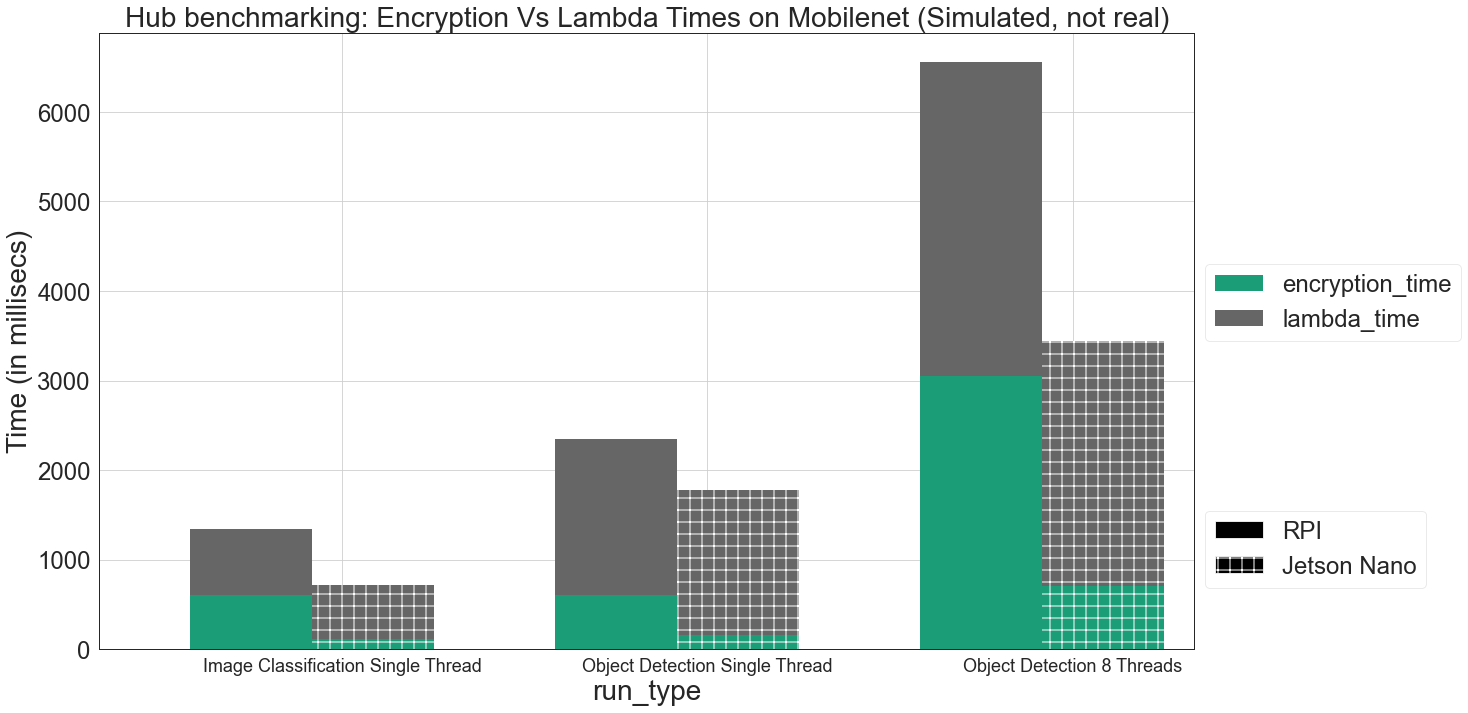

In [203]:
plt.figure(figsize=(20,10))
plot_clustered_stacked([df_g2_rpi_med, df_g2_jetson_med],["RPI", "Jetson Nano"],cmap='Dark2')
plt.grid(True)
plt.title("Hub benchmarking: Encryption Vs Lambda Times on Mobilenet (Simulated, not real)")
plt.ylabel("Time (in millisecs)")
# plt.xticks(rotation=10)
plt.tight_layout()
plt.savefig(f"{plotting_dir}/graph2_hub_benchmarking.png",dpi=150)

# Graph 3: Concurrency analysis over models

In [319]:
# Fetch jetson Data
jetson_folder = f'{data_dir}/Graph 3/Jetson'
threads = [1,2,4,8,16]
df_g3_jetson=None

for filename in glob.glob(f'{jetson_folder}/*'):
    for model in model_name_map.keys():
        for thread_count in threads:
            if (model in filename) & (f"_{thread_count}_" in filename):
    #             print(i, filename, lambda_functions_map[lambda_model])
                df_model = pd.read_csv(filename)
                df_model['model'] = model_name_map[model]
                df_model['thread_count'] = thread_count
                if df_g3_jetson is None:
                    df_g3_jetson = df_model.copy(deep=True)
                else:
                    df_g3_jetson = pd.concat([df_g3_jetson,df_model],ignore_index=True)
df_g3_jetson

,sid,tid,app_model,app_input,app_format,app_run,app_top,model,thread_count
0,1,0,29.431575,0.000719,0.332220,10.100574,0.573457,DenseNet,2
1,2,0,29.431575,0.035167,0.054865,0.425765,0.003580,DenseNet,2
2,4,0,29.431575,0.001712,0.005570,0.194637,0.001978,DenseNet,2
3,6,0,29.431575,0.000900,0.178948,0.189116,0.003478,DenseNet,2
4,8,0,29.431575,0.001468,0.188713,0.187946,0.011722,DenseNet,2
...,...,...,...,...,...,...,...,...,...
5095,95,0,32.527381,0.001377,0.005338,0.032892,0.002311,AlexNet,1
5096,96,0,32.527381,0.001412,0.003288,0.031172,0.004277,AlexNet,1
5097,97,0,32.527381,0.001483,0.006215,0.032901,0.005164,AlexNet,1
5098,98,0,32.527381,0.001327,0.004874,0.032822,0.004782,AlexNet,1


In [320]:
df_g3_jetson['app_total'] = df_g3_jetson['app_input']+df_g3_jetson['app_format']+df_g3_jetson['app_run']+df_g3_jetson['app_top']
df_g3_jetson_med = df_g3_jetson.groupby(['model','thread_count'],as_index=False)['app_total'].median()
df_g3_jetson_med['app_total'] = df_g3_jetson_med['app_total']*1000
df_g3_jetson_med = df_g3_jetson_med.rename(columns={'app_total':'Execution Time(in ms)'})
df_g3_jetson_med

,model,thread_count,Execution Time(in ms)
0,AlexNet,1,43.208957
1,AlexNet,2,74.093819
2,DenseNet,1,192.885518
3,DenseNet,2,378.317833
4,DenseNet,4,720.288515
5,MobileNet,1,24.337292
6,MobileNet,2,38.599730
7,MobileNet,4,71.773648
8,MobileNet,8,138.029695
9,MobileNet,16,257.515550


In [321]:
# Fetch lambda Data
lambda_folder = f'{data_dir}/Graph 3/Lambda'
threads = [1,2,4,8,16]
df_g3_lambda=None

for filename in glob.glob(f'{lambda_folder}/*'):
    for fn in lambda_functions_map.keys():
        for thread_count in threads:
            if (fn in filename) & (f"_{thread_count}_" in filename):
    #             print(i, filename, lambda_functions_map[lambda_fn])
                df_fn = pd.read_csv(filename)
                df_fn['model'] = lambda_functions_map[fn]
                df_fn['thread_count'] = thread_count
                df_fn = df_fn.iloc[1:,:]
                if df_g3_lambda is None:
                    df_g3_lambda = df_fn.copy(deep=True)
                else:
                    df_g3_lambda = pd.concat([df_g3_lambda,df_fn],ignore_index=True)
df_g3_lambda

,sid,tid,invoke_time,app_input,app_format,app_tvm,app_top,wrapper_app,wrapper_appkey,wrapper_decrypt_key,wrapper_decrypt_data,wrapper_encrypt_response,total_time,model,thread_count
0,4,0,20210704_153240,0.501,0.467,594.717,0.036,622,1,295,154,7,1430.437803,AlexNet,4
1,8,0,20210704_153241,0.612,0.570,652.762,0.038,668,1,93,36,6,1105.422497,AlexNet,4
2,12,0,20210704_153243,1.275,0.627,610.850,0.040,639,1,112,35,5,1324.652672,AlexNet,4
3,16,0,20210704_153244,0.496,0.463,574.618,0.036,589,0,182,32,6,1121.287823,AlexNet,4
4,18,0,20210704_153246,0.689,0.527,650.935,0.035,666,0,109,24,6,1133.662224,AlexNet,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17450,1540,15,20210704_170906,7.954,2.016,6631.731,-1.000,6663,0,88,145,4,7272.875071,YOLODarknet,16
17451,1553,15,20210704_170915,8.351,2.155,6128.206,-1.000,6160,0,84,119,5,6938.017368,YOLODarknet,16
17452,1561,15,20210704_170925,8.740,2.166,6870.500,-1.000,6902,1,73,147,3,7531.275511,YOLODarknet,16
17453,1578,15,20210704_170935,8.723,2.054,6895.744,-1.000,6926,0,75,123,5,7846.823931,YOLODarknet,16


In [322]:
df_g3_lambda_med = df_g3_lambda.groupby(['model','thread_count'],as_index=False)['total_time'].median()
df_g3_lambda_med = df_g3_lambda_med.rename(columns={'total_time':'Execution Time(in ms)'})

In [323]:
df_g3_lambda_med['model'] = df_g3_lambda_med['model']+'_lambda'
df_g3_jetson_med['model'] = df_g3_jetson_med['model']+'_jetson'
df_g3 = pd.concat([df_g3_lambda_med,df_g3_jetson_med],ignore_index=True)
df_g3

,model,thread_count,Execution Time(in ms)
0,AlexNet_lambda,1,1017.103672
1,AlexNet_lambda,2,1037.485838
2,AlexNet_lambda,4,1071.866393
3,AlexNet_lambda,8,1120.008469
4,AlexNet_lambda,16,1175.721288
5,DenseNet_lambda,1,1119.271040
6,DenseNet_lambda,2,1129.294753
7,DenseNet_lambda,4,1155.757785
8,DenseNet_lambda,8,1214.237332
9,DenseNet_lambda,16,1261.078000


In [324]:
# g3_models = ['MobileNet','AlexNet','DenseNet','SSDMobilenet','YOLODarknet']
# g3_tc = [1,2,4,8,16]
# g3_base = []
# for model in g3_models:
#     for tc in g3_tc:
#         for runtime in ['lambda','jetson']:
#             g3_base.append([f"{model}_{runtime}",tc])
# df_g3_base = pd.DataFrame(g3_base, columns=['model','thread_count'])
# df_g3 = pd.merge(df_g3_base, df_g3,on=['model','thread_count'],how='left')
# df_g3.loc[df_g3['Execution Time(in ms)'].isnull(),'Execution Time(in ms)'] = df_g3['Execution Time(in ms)'].max()
# df_g3

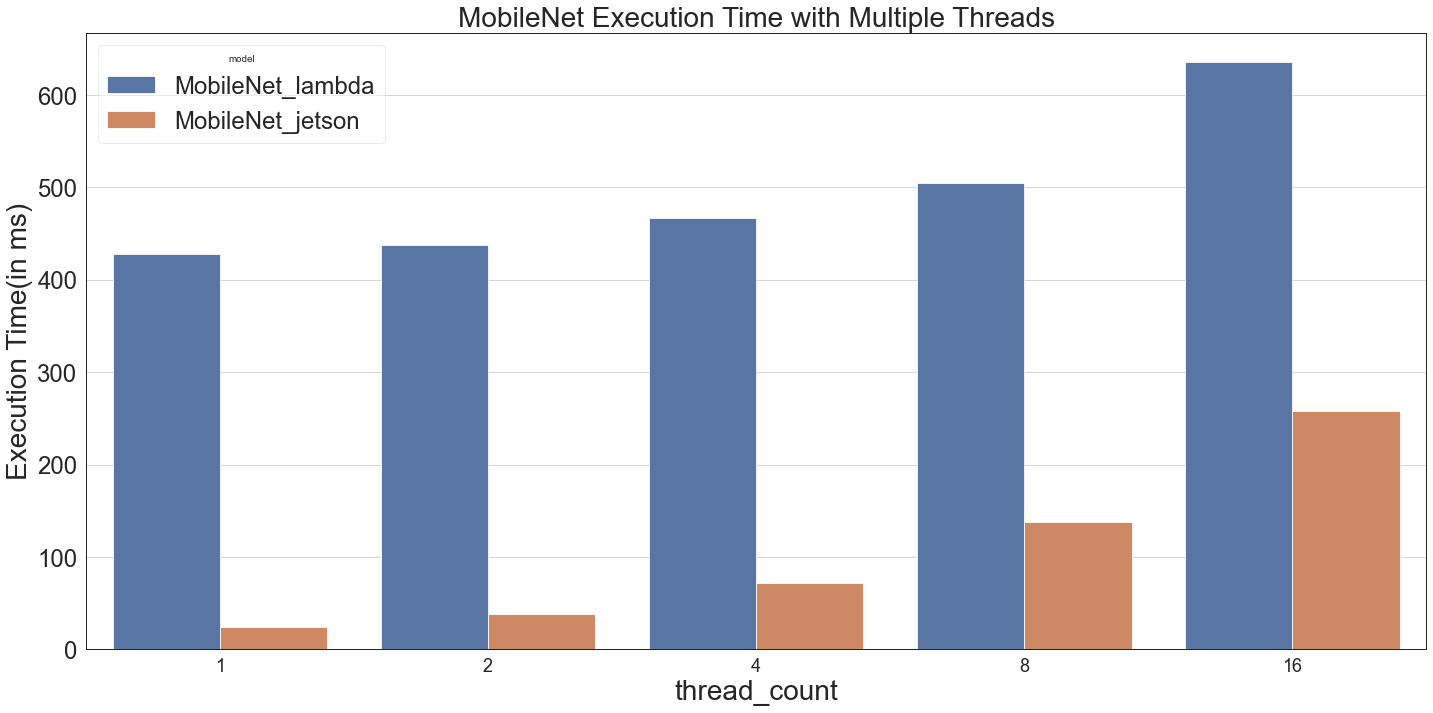

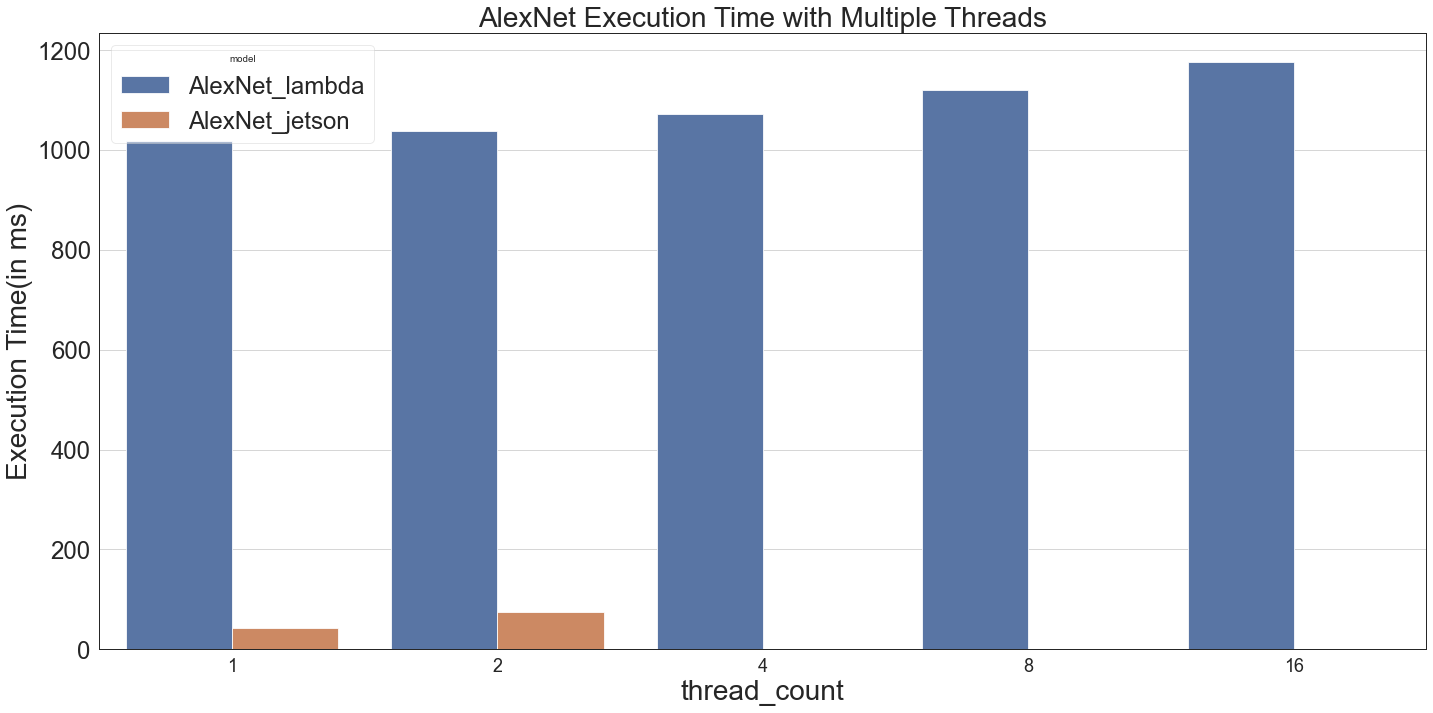

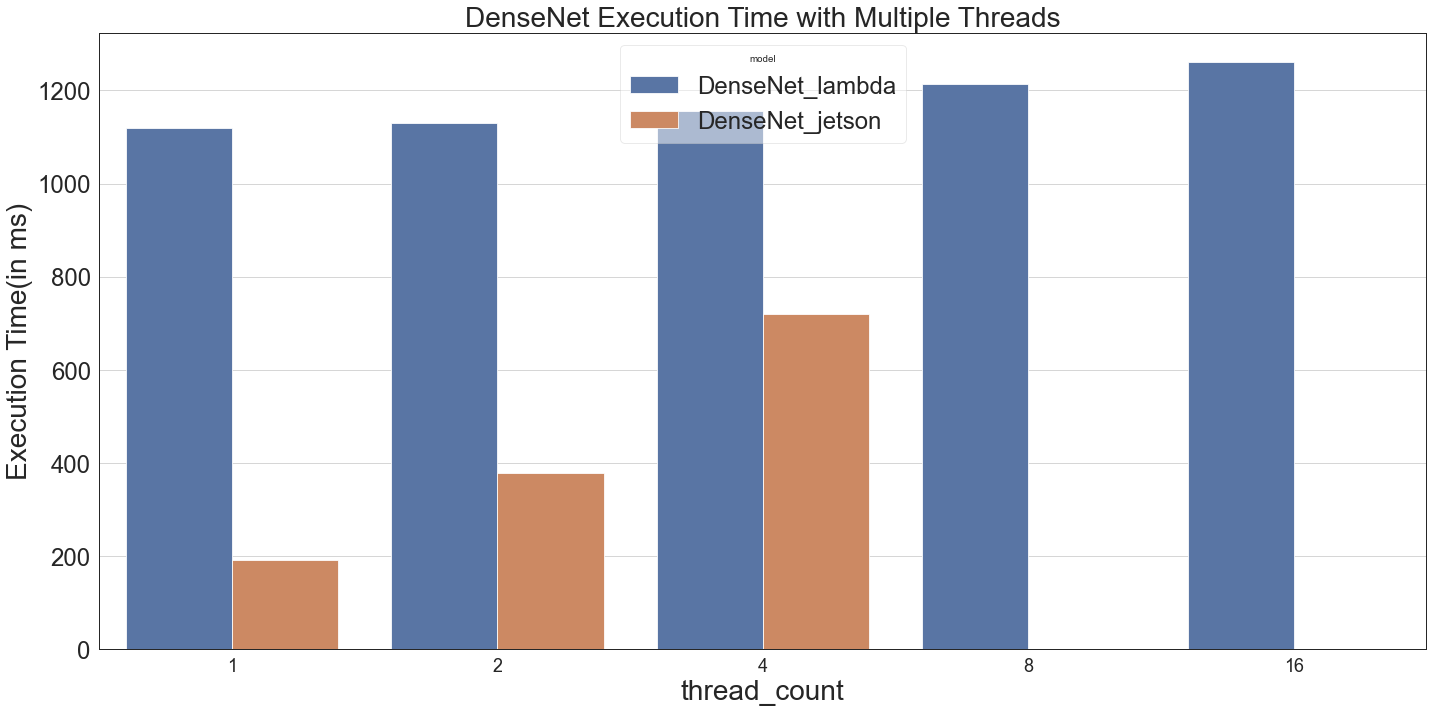

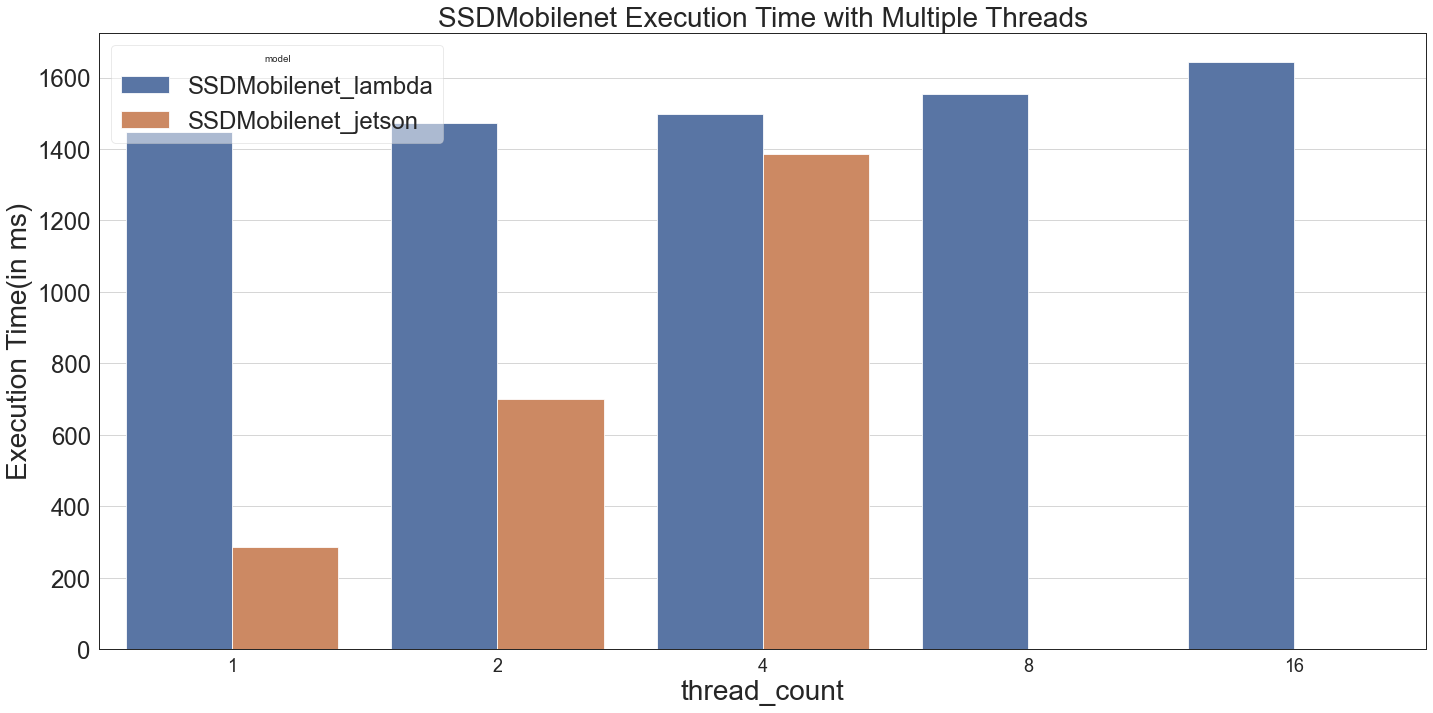

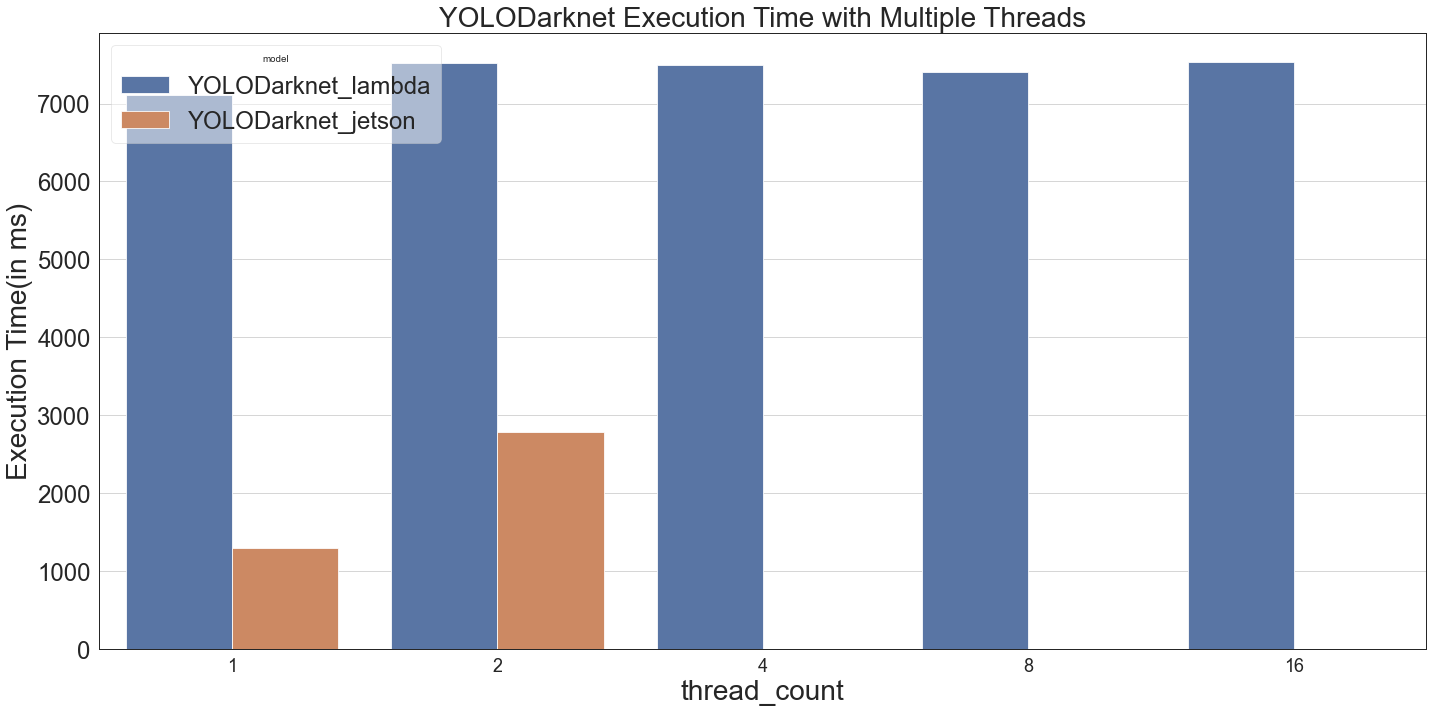

In [326]:
for model in ['MobileNet','AlexNet','DenseNet','SSDMobilenet','YOLODarknet']:
    plt.figure(figsize=(20,10))
    df_g3_model = df_g3[df_g3.model.apply(lambda x: model in x)]
    sns.barplot(data=df_g3_model, x='thread_count',y='Execution Time(in ms)', hue='model')
    plt.title(f"{model} Execution Time with Multiple Threads")
    plt.tight_layout()
    plt.savefig(f"{plotting_dir}/Graph3_{model}.png",dpi=150)

# Graph 5

In [354]:
g5_dir = f"{data_dir}/Graph 5"
df_g5 =None
request_type_map = {
    0.005:'Burst',
    0.05:'Standard',
    0.5:'Slow'
}

for filename in glob.glob(f"{g5_dir}/*"):
    for lval in [0,1,2,3,4]:
        for pi_val in [0.005,0.5,5]:
            if (f"L{lval}_R1_PI{pi_val}" in filename):
                df_model = pd.read_csv(filename)
                df_model['max_local_instances'] = lval+1
                df_model['request_type'] = request_type_map[pi_val]
                if df_g5 is None:
                    df_g5 = df_model.copy(deep=True)
                else:
                    df_g5 = pd.concat([df_g5,df_model],ignore_index=True)

df_g5
    

,uuid,invocation_timestr,invocation_timestamp,receive_timestr,receive_timestamp,runtime,app_model,app_input,app_format,app_run,app_top,wrapper_app,wrapper_appkey,wrapper_decrypt_key,wrapper_decrypt_data,wrapper_encrypt_response,total_time,encryption_time,lambda_time,max_local_instances,request_type
0,1b49bc0c-c4c5-48e5-b658-775040ad68d8,20210705_221753,1625537873,20210705_221753,1625537873,jetson,0.192524,0.000520,0.002811,0.233067,0.005106,-1,-1,-1,-1,-1,0.483487,-1.000000,-1.000000,1,Standard
1,5331a316-c6ec-4a45-b259-d6290607a39c,20210705_221754,1625537874,20210705_221754,1625537874,jetson,0.167208,0.000489,0.002640,0.154160,0.002076,-1,-1,-1,-1,-1,0.405331,-1.000000,-1.000000,1,Standard
2,995c9bb5-2353-46a2-a535-27b222534f4d,20210705_221755,1625537875,20210705_221756,1625537876,jetson,0.176745,0.000499,0.003058,0.132151,0.001816,-1,-1,-1,-1,-1,0.406413,-1.000000,-1.000000,1,Standard
3,0bb4d6db-4267-4834-b7a1-9562c84ab705,20210705_221757,1625537877,20210705_221757,1625537877,jetson,0.174406,0.000493,0.002822,0.156006,0.001659,-1,-1,-1,-1,-1,0.438448,-1.000000,-1.000000,1,Standard
4,3ec67536-f8ba-4ebc-9086-c0d145cf8fc6,20210705_221758,1625537878,20210705_221758,1625537878,jetson,0.228996,0.000620,0.003374,0.226563,0.004734,-1,-1,-1,-1,-1,0.528439,-1.000000,-1.000000,1,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,e88d264d-8d1e-4d51-a8dd-e87cb2a37e77,20210705_165302,1625518382,20210705_165307,1625518387,lambda,-1.000000,0.514000,0.438000,14.428000,0.027000,17,1,67,17,4,396.471739,5.223083,0.565391,0,Slow
1035,32a7a49e-0b3a-4b81-aad7-ae5a886b7062,20210705_165307,1625518387,20210705_165313,1625518393,lambda,-1.000000,0.621000,0.505000,20.940000,0.031000,24,0,60,25,4,405.458212,4.782191,0.579457,0,Slow
1036,839a3bc7-78fa-4cef-8fa8-dbc353a9549b,20210705_165313,1625518393,20210705_165319,1625518399,lambda,-1.000000,0.475000,0.444000,14.621000,0.026000,18,0,60,17,4,362.763643,5.173953,0.756765,0,Slow
1037,c7e91f95-b0c7-4298-ba62-0b873589a971,20210705_165319,1625518399,20210705_165325,1625518405,lambda,-1.000000,0.488000,0.444000,14.611000,0.028000,17,0,60,17,5,394.289255,5.357404,0.564370,0,Slow


In [355]:
df_g5[df_g5.max_local_instances==2]

,uuid,invocation_timestr,invocation_timestamp,receive_timestr,receive_timestamp,runtime,app_model,app_input,app_format,app_run,app_top,wrapper_app,wrapper_appkey,wrapper_decrypt_key,wrapper_decrypt_data,wrapper_encrypt_response,total_time,encryption_time,lambda_time,max_local_instances,request_type
150,e6024138-d080-4dc2-b35b-146b131846ec,20210705_180936,1625522976,20210705_180936,1625522976,jetson,0.183122,0.000527,0.003028,0.151566,0.001906,-1,-1,-1,-1,-1,0.423444,-1.000000,-1.000000,2,Standard
151,5405d233-0cd3-4f41-9e50-f904d7a662f5,20210705_180937,1625522977,20210705_180938,1625522978,jetson,0.166367,0.000512,0.002856,0.139312,0.001341,-1,-1,-1,-1,-1,0.384058,-1.000000,-1.000000,2,Standard
152,1eae44e6-c14c-4a52-bbb8-f6f7523036f6,20210705_180939,1625522979,20210705_180939,1625522979,jetson,0.233209,0.000624,0.003242,0.161116,0.001618,-1,-1,-1,-1,-1,0.469089,-1.000000,-1.000000,2,Standard
153,fe8e52a1-c35e-4eac-9f67-c6b77e1ef939,20210705_180940,1625522980,20210705_180940,1625522980,jetson,0.166841,0.000511,0.002828,0.155612,0.001167,-1,-1,-1,-1,-1,0.387398,-1.000000,-1.000000,2,Standard
154,58ec2dbc-fb78-4149-ab4d-a4f9f06b7424,20210705_180941,1625522981,20210705_180942,1625522982,jetson,0.169785,0.000517,0.003061,0.158728,0.001297,-1,-1,-1,-1,-1,0.416648,-1.000000,-1.000000,2,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,68131a46-2bd1-420c-b107-15104b44be87,20210705_182156,1625523716,20210705_182202,1625523722,lambda,-1.000000,0.577000,0.508000,15.968000,0.028000,19,0,80,18,8,396.718979,5.232291,0.798368,2,Slow
885,6a20d12c-eeb4-43b6-be52-87599cc03a94,20210705_182207,1625523727,20210705_182212,1625523732,lambda,-1.000000,12.502000,0.499000,19.349000,0.030000,35,0,63,17,4,398.963451,4.834596,0.571808,2,Slow
886,9ba5dcfd-7d51-4ce7-9c5f-117888511c2e,20210705_182213,1625523733,20210705_182219,1625523739,lambda,-1.000000,0.548000,0.495000,15.341000,0.030000,18,0,80,18,4,434.164524,5.717563,0.615661,2,Slow
887,040b87c0-0ab7-4b7d-bfc4-b8080d52a7db,20210705_181924,1625523564,20210705_182626,1625523986,jetson,19.520841,0.045229,7.474988,386.761612,6.164788,-1,-1,-1,-1,-1,421.725598,-1.000000,-1.000000,2,Slow


In [356]:
df_g5['e2e_time'] = (df_g5['receive_timestamp']- df_g5['invocation_timestamp'])
df_g5 = df_g5.groupby(['max_local_instances','request_type'],as_index=False)['e2e_time'].mean()
df_g5

,max_local_instances,request_type,e2e_time
0,0,Burst,6.540000
1,0,Slow,6.010000
2,0,Standard,6.696970
3,1,Burst,5.240000
4,1,Slow,0.460000
5,1,Standard,0.440000
6,2,Burst,0.460000
7,2,Slow,25.494949
8,2,Standard,1.360000
9,3,Burst,676.940000


<AxesSubplot:xlabel='max_local_instances', ylabel='e2e_time'>

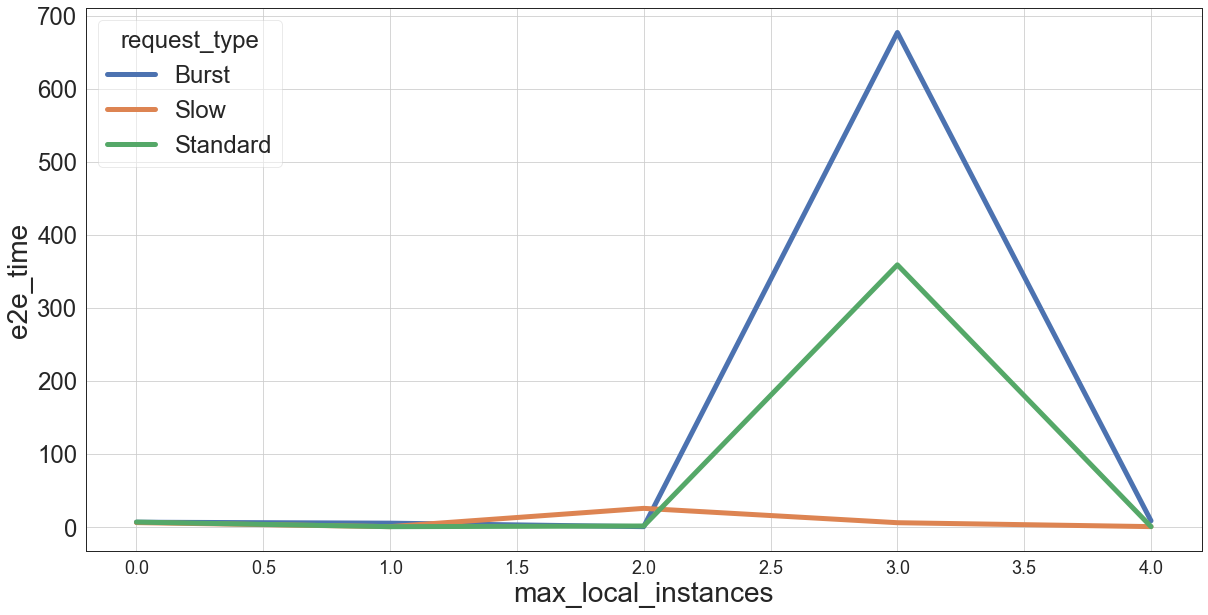

In [357]:

plt.figure(figsize=(20,10))
sns.lineplot(data=df_g5, x='max_local_instances',y='e2e_time',hue='request_type')

- Average End to End Latency for single workload
- Fraction of Offloaded tasks
- boxplot of end to end latency
- 